In [1]:
# kütüphaneleri dahil ediyoruz
import numpy as np # veriler üzerinde istatiksel işlemler uygulamak için
import pandas as pd # veriler üzerinde hakimiyet kurabilmek için
import matplotlib.pyplot as plt # verileri görselleştirme ve çeşitli işlemler için
import seaborn as sns # matplotlib'in yanı sıra daha çeşitli görselleştirme ve istatiksel işlemler için

# önemsiz uyarı açıklamalarını kapatmak için ekstra bu kütüphaneyi de ekliyoruz.
import warnings

warnings.filterwarnings("ignore")

In [2]:
# verileri projeye dahil edelim

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test_x.csv")

# orijnal verilerde kayıp veya değişiklik olmaması için (tekrar gözlemelemek için) kopyalıyoruz.
df_train = train_data.copy() 
df_test = test_data.copy()

In [3]:
df_train.head() # veriye dair ilk gözlem
# ancak sütun isimlerine dair düzgün bilgi vermiyor. Daha çeşitli bilgilere erişmek için
# biraz daha istatiksel olarak kurcalamak lazım.

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,...,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,...,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4


In [4]:
df_train.shape # veri ve gözlem sayısı

(65125, 44)

In [5]:
df_train.info() # verinin tamamı hakkında özet bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 64334 non-null  object 
 5   Ikametgah Sehri                                            63088 non-null  object 
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  object 
 8   Burslu

In [6]:
# verideki isimlendirmeler bir 'ankete' göre yapılmış. Ancak biz bunları kod alanına döktüğümüzde problem yaşıyoruz.
# hem çok uzun hem de kafa karıştırıcı. Dolayısıyla bu datasetin üzerinde oynarken kolayımıza gelecek şekilde isimleri değistiriyoruz.
# rename parametresinde sözlük tipinde isimleri değiştiriyoruz ancak yaptığımızın kalıcı olmasını istiyorsak,
# sonuna 'inplace' yapısını ekliyoruz. 
df_train.rename(columns={"Basvuru Yili": "b_yili",
                        "Degerlendirme Puani": "D_puani",
                        "Cinsiyet": "cinsiyet",
                        "Dogum Tarihi": "d_tarihi",
                        "Dogum Yeri": "d_yeri",
                        "Ikametgah Sehri": "ikametgah",
                        "Universite Adi": "uni_adi",
                        "Universite Turu": "uni_turu",
                        "Burslu ise Burs Yuzdesi": "burs_yuzdesi",
                        "Burs Aliyor mu?": "bursu_varmi",
                        "Bölüm": "bolum",
                        "Universite Kacinci Sinif": "uni_kacinci_sinif",
                        "Universite Not Ortalamasi": "uni_not_ort",
                        "Daha Once Baska Bir Universiteden Mezun Olmus": "baska_uni_mezunmu",
                        "Lise Adi": "lise_adi",
                        "Lise Adi Diger": "lise_diger",
                        "Lise Sehir": "lise_sehir",
                        "Lise Turu": "lise_turu",
                        "Lise Bolumu": "lise_bolumu",
                        "Lise Bolum Diger": "lise_bolum_diger",
                        "Lise Mezuniyet Notu": "lise_mez_notu",
                        "Baska Bir Kurumdan Burs Aliyor mu?": "baska_burs_varmi",
                        "Burs Aldigi Baska Kurum": "burs_aldigi_kurum",
                        "Baska Kurumdan Aldigi Burs Miktari": "bk_burs_miktari",
                        "Anne Egitim Durumu": "a_egitim_durumu",
                        "Anne Calisma Durumu": "a_calisma_durumu",
                        "Anne Sektor": "a_sektor",
                        "Baba Egitim Durumu":"b_egitim_durumu",
                        "Baba Calisma Durumu": "b_calisma_durumu",
                        "Baba Sektor":"b_sektor",
                        "Kardes Sayisi":"k_sayisi",
                        "Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?":"gir_klube_uyemi",
                        "Uye Oldugunuz Kulubun Ismi":"kulup_ismi",
                        "Profesyonel Bir Spor Daliyla Mesgul musunuz?":"spor_dali_mesgulmu",
                        "Spor Dalindaki Rolunuz Nedir?":"spor_rolu_ne",
                        "Aktif olarak bir STK üyesi misiniz?":"aktif_stk_uyesimi",
                        "Hangi STK'nin Uyesisiniz?":"hangi_stk",
                        "Stk Projesine Katildiniz Mi?":"stk_proje_katildimi",
                        "Girisimcilikle Ilgili Deneyiminiz Var Mi?":"gir_deneyim_varmi",
                        "Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?":"gir_deneyim_acikla",
                        "Ingilizce Biliyor musunuz?":"ing_varmi",
                        "Ingilizce Seviyeniz?":"ing_seviye",
                        "Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite":"ikinci_uni_varmi"}, inplace = True)

In [7]:
df_train.describe().T # sayısal veriler üzerinde istatiksel gözlem

,count,mean,std,min,25%,50%,75%,max
b_yili,65125.0,2018.277298,2.669979,2014.0,2016.0,2019.0,2021.0,2022.0
D_puani,65124.0,32.086466,18.139239,0.0,18.0,29.0,44.0,102.0
burs_yuzdesi,22440.0,34.226181,41.632412,0.0,0.0,0.0,75.0,100.0
id,65125.0,32562.000000,18800.112478,0.0,16281.0,32562.0,48843.0,65124.0


In [8]:
# eksik verilerin gözlemi

df_train.isnull().sum()

b_yili                     0
D_puani                    1
cinsiyet                 169
d_tarihi                 177
d_yeri                   791
ikametgah               2037
uni_adi                  132
uni_turu                 255
burs_yuzdesi           42685
bursu_varmi                0
bolum                    231
uni_kacinci_sinif        374
uni_not_ort             2753
baska_uni_mezunmu      37345
lise_adi                 384
lise_diger             60392
lise_sehir              1054
lise_turu                847
lise_bolumu             1009
lise_bolum_diger       63599
lise_mez_notu           5917
baska_burs_varmi         231
burs_aldigi_kurum      43977
bk_burs_miktari        44162
a_egitim_durumu          406
a_calisma_durumu       11896
a_sektor               34537
b_egitim_durumu         1007
b_calisma_durumu       12618
b_sektor               20378
k_sayisi                1132
gir_klube_uyemi         1829
kulup_ismi             48691
spor_dali_mesgulmu      1115
spor_rolu_ne  

In [9]:
# verinin içindeki 'id' parametresini indeks haline geçiriyoruz. (gerek duyulmadı)

# df_train.set_index('id', inplace = True)

# df_train.head()

In [10]:
# değerlendirme puanı kısmında bir tane eksik veri vardı onu da '0' ile doldurduk.
# temel olarak ilk olarak bu şekilde bir gözlem gerçekleştirelim ardından değiştirebiliriz

df_train['D_puani'].fillna(0.0, inplace= True)

In [11]:
df_train.tail()

,b_yili,D_puani,cinsiyet,d_tarihi,d_yeri,ikametgah,uni_adi,uni_turu,burs_yuzdesi,bursu_varmi,...,spor_rolu_ne,aktif_stk_uyesimi,hangi_stk,stk_proje_katildimi,gir_deneyim_varmi,gir_deneyim_acikla,ing_varmi,ing_seviye,ikinci_uni_varmi,id
65120,2022,0.0,Erkek,18.06.2003 00:00,İstanbul,İstanbul,İstanbul Aydın Üniversitesi,Özel,NaN,Evet,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65120
65121,2022,0.0,Erkek,18.04.2002 00:00,Hatay,Muğla,Muğla Sıtkı Koçman Üniversitesi,Devlet,NaN,Hayır,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65121
65122,2022,0.0,Erkek,23.10.1999 00:00,Mersin,Mersin,Süleyman Demirel Üniversitesi,Devlet,NaN,Hayır,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65122
65123,2022,0.0,Erkek,17.11.2000 00:00,Samsun,Samsun,Karabük Üniversitesi,Devlet,NaN,Hayır,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65123
65124,2022,0.0,Kadın,27.04.2000 00:00,Hatay,Hatay,Gaziantep Üniversitesi,Devlet,NaN,Hayır,...,Takım Oyuncusu,Evet,Genç Kızılay Topluluğu'nda 3 yıldır gönüllüyüm...,NaN,Evet,Aile desteğiyle yemek sektöründe küçük bir işl...,Evet,NaN,NaN,65124


In [12]:
# Kategorik değişkenler üzerinde sayma gerçekleştirip gözlem yapabilmek adına bunu görselleştiriyoruz.
# Fonksiyon oluşturma amacımız görselleştirme işlemini belirlediğimiz standarda göre işlemek 
# Yani belirli ölçütler verdik ve buna bağlı tüm kategorik verilerin 'value_counts'larını aldık.
def plotBar(degisken, n = 10):
    df_ = df_train[degisken]
    df_sayma = df_.value_counts()
    df_sayma = df_sayma[:n]
    plt.figure()
    plt.bar(df_sayma.index, df_sayma, color = "red")
    plt.xticks(df_sayma.index, df_sayma.index.values)
    plt.xticks(rotation=60)
    plt.ylabel("Frekans")
    plt.title(f"Veri Sıklığı - {degisken}")
    plt.show()
    print(f"{degisken}: \n {df_sayma}")

In [13]:
# cat_df = df_train.select_dtypes(include = ['object'])

# for i in cat_df:
    # plotBar(i)

In [14]:
df_train[(df_train['b_yili'] == 2022) & (df_train['D_puani'] >= 60)]

,b_yili,D_puani,cinsiyet,d_tarihi,d_yeri,ikametgah,uni_adi,uni_turu,burs_yuzdesi,bursu_varmi,...,spor_rolu_ne,aktif_stk_uyesimi,hangi_stk,stk_proje_katildimi,gir_deneyim_varmi,gir_deneyim_acikla,ing_varmi,ing_seviye,ikinci_uni_varmi,id
57503,2022,67.0,Kadın,19.04.2002 00:00,Adana,İstanbul,Marmara Üniversitesi,Devlet,NaN,Hayır,...,Bireysel,Evet,Üniversite kulüplerinde aktif rol alıyorum ( G...,NaN,Evet,İşletme Kulübü bünyesinde Girişimcilik Departm...,Evet,NaN,NaN,57503
57504,2022,67.0,Kadın,10.05.2001 00:00,Antalya,İstanbul,Boğaziçi Üniversitesi,Devlet,NaN,Hayır,...,Lider/Kaptan,Evet,Bir süreliğine Af Örgütü'nde gönüllü çalıştım....,NaN,Evet,Size&Me adlı girişimde 7 aylığına kurucu ortak...,Evet,NaN,NaN,57504
57505,2022,67.0,Kadın,9.04.2001 00:00,Diğer,İzmir,Dokuz Eylül Üniversitesi,Devlet,NaN,Hayır,...,Bireysel,Evet,Liseye başladığmdan beri gönüllülük hayatımın ...,NaN,Evet,"2021 senesinde 2 yakın arkadaşımla birlikte ""M...",Evet,NaN,NaN,57505
57506,2022,66.0,Erkek,20.03.2001 00:00,Hatay,İstanbul,Koç Üniversitesi,Özel,NaN,Evet,...,Lider/Kaptan,Evet,"Expo2021 Hatay Gönüllüsü, Tema Vakfı gönüllüsü...",NaN,Evet,Katıldığım birçok programda girişim fikri üzer...,Evet,NaN,NaN,57506
57507,2022,66.0,Kadın,4.02.2000 00:00,İzmir,Ankara,Orta Doğu Teknik Üniversitesi,Devlet,NaN,Hayır,...,Takım Oyuncusu,Evet,2018-2021 yılları arasında ODTÜ bünyesindeki Ç...,NaN,Evet,"Lisede instagram'da başladığım ""oncekahvem"" is...",Evet,NaN,NaN,57507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57636,2022,60.0,Erkek,15.03.2001 00:00,Balıkesir,Muş,Atatürk Üniversitesi,Devlet,NaN,Hayır,...,Takım Oyuncusu,Evet,Afad gönüllüsüyüm ve de ihh derneği bünyesinde...,NaN,Evet,Arkadaşlarımla birlikte para topladık ve bozuk...,Evet,NaN,NaN,57636
57637,2022,60.0,Kadın,15.02.2002 00:00,İzmir,İstanbul,Boğaziçi Üniversitesi,Devlet,NaN,Hayır,...,Bireysel,Evet,Lisede FRC Robotik Yarışması 6429 takım üyesiy...,NaN,Evet,Lisede bir robotik takımı üyesiydim ve bu bağl...,Evet,NaN,NaN,57637
57638,2022,60.0,Erkek,24.10.2001 00:00,Batman,Batman,Kocaeli Üniversitesi,Devlet,NaN,Hayır,...,Takım Oyuncusu,Evet,İnsani yardımlarda ve belediyenin çöp toplama ...,NaN,Evet,Lisede kendi tasarladığım oyuncakları satıyordum.,Evet,NaN,NaN,57638
57639,2022,60.0,Kadın,12.03.2001 00:00,Ankara,İstanbul,TOBB Ekonomi ve Teknoloji Üniversitesi,Özel,NaN,Hayır,...,Lider/Kaptan,Evet,okulumuzun hayvan severler derneğine üyeyim. b...,NaN,Evet,Şu an takım arkadaşlarımla beraber geliştirmek...,Evet,NaN,NaN,57639


## Düzenlemeler

### Cinsiyet bölümü

In [15]:
df_train['cinsiyet'].unique() # cinsiyet sütunundaki tüm benzersiz verileri gözlemiyoruz

array(['Erkek', 'Kadın', 'ERKEK', 'Belirtmek istemiyorum', nan],
      dtype=object)

In [16]:
df_train['cinsiyet'] = df_train['cinsiyet'].str.lower() # aynı veriler olduğu ancak büyük küçük harf dengesizliğinden tüm veriyi küçük harfe dönüştürüyorum
df_train['cinsiyet'] = df_train['cinsiyet'].fillna('belirtmek istemiyorum') # boş verileri dolduruyorum

In [17]:
df_train['cinsiyet'].isnull().sum() # boş verileri gözlemliyorum

0

In [18]:
cins = {'belirtmek istemiyorum': 0,
       'erkek': 1,
       'kadın': 2} # veriler üzerinde sayısal dönüşüm uygulamak için uygun hale getiriyorum.

df_train['cinsiyet'] = df_train['cinsiyet'].map(cins).astype(int)

In [19]:
df_train['cinsiyet'].value_counts() # ayrıca verideki dengeleri gözetlemek istiyorum bu yüzden value_counts ile saydırma işlemi gerçekleştiriyorum.

cinsiyet
1    32764
2    32077
0      284
Name: count, dtype: int64

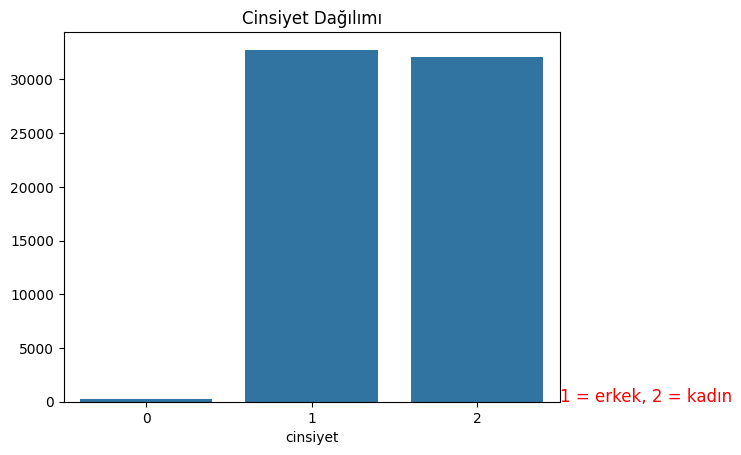

In [20]:
toplam = df_train['cinsiyet'].value_counts()
sns.barplot(x=toplam.index, y=toplam.values)
plt.title('Cinsiyet Dağılımı')
plt.text(2.5, 25, "1 = erkek, 2 = kadın", fontsize=12, color='red')
plt.show()

### doğum tarihi bölümü

In [21]:
# benzer şeyleri tüm bu kirli veriler için uygulayacağım ancak farklı olan bazı şeylerin üzerine düşeceğim.

df_train['d_tarihi'].unique()

array(['4/6/1994', '6/11/1993', '1/15/1986', ..., '10.04.2003 00:00',
       '13.12.1997 00:00', '12.11.2003 00:00'], dtype=object)

In [22]:
from datetime import datetime

df_train['d_tarihi'] = pd.to_datetime(df_train['d_tarihi'], errors='coerce', dayfirst=True)
df_train['d_tarihi'] = df_train['d_tarihi'].fillna(pd.Timestamp('2000-01-01'))
df_train['yil'] = df_train['d_tarihi'].dt.year # bu noktada 'datetime' kütüphanesiyle verideki düzensiz 'doğum tarihi' sütununu
# düzeltme imkanı buluyoruz. 'yıl,ay, ve yaş' şeklinde üç farklı sütuna böleceğiz. 
today = datetime.today()
df_train['yas'] = today.year - df_train['yil']
df_train['ay'] = df_train['d_tarihi'].dt.month
df_train['yil']= df_train['yil'].astype(int)

df_train=df_train.drop('d_tarihi',axis=1)

### dogum yeri bölümü

In [23]:
df_train['d_yeri'].unique()

array(['Altindag, Ankara', 'Üsküdar', 'Samsun', ..., 'bergama/ izmir',
       'Tacikistan', 'Ankara keçiören'], dtype=object)

In [24]:
df_train['d_yeri'].isnull().sum()

791

In [25]:
sehirler = [
    "Adana", "Adıyaman", "Afyonkarahisar", "Ağrı", "Aksaray", "Amasya", "Ankara", "Antalya",
    "Ardahan", "Artvin", "Aydın", "Balıkesir", "Bartın", "Batman", "Bayburt", "Bilecik", "Bingöl",
    "Bitlis", "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum", "Denizli", "Diyarbakır",
    "Düzce", "Edirne", "Elazığ", "Erzincan", "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane",
    "Hakkari", "Hatay", "Iğdır", "Isparta", "İstanbul", "İzmir", "Kahramanmaraş", "Karabük", "Karaman",
    "Kars", "Kastamonu", "Kayseri", "Kilis", "Kırıkkale", "Kırklareli", "Kırşehir", "Kocaeli", "Konya",
    "Kütahya", "Malatya", "Manisa", "Mardin", "Mersin", "Muğla", "Muş", "Nevşehir", "Niğde", "Ordu",
    "Osmaniye", "Rize", "Sakarya", "Samsun", "Siirt", "Sinop", "Sivas", "Şanlıurfa", "Şırnak", "Tekirdağ",
    "Tokat", "Trabzon", "Tunceli", "Uşak", "Van", "Yalova", "Yozgat", "Zonguldak"
]

# doğum yeri gibi bilgiler barındıran yerler aşırı düzensiz olduğu için elimizle oluşturduğumuz
# şehirler veriseti vasıtasıyla bu düzensiz veriyi saptama ve sonucunda değiştirme uyguluyoruz alttaki fonksiyon ile.
def temizle_sehir(sehir):
    if pd.isna(sehir):
        return None
    if isinstance(sehir, str):
        sehir = sehir.lower()
        sehir = sehir.strip()

        for il in sehirler:
            if il.lower() in sehir:
                return il
    return None

In [26]:
df_train["d_yeri"] = df_train["d_yeri"].apply(temizle_sehir) 

In [27]:
turkish_characters = str.maketrans('çğıöşü', 'cgiosu') # türkçe karakter problemi bulunan birkaç yer için
# str'nin maketrans parametresini kullanacağız. dönüşüm sağlıyoruz

In [28]:
# df_train['d_yeri'] = df_train['d_yeri'].str.lower().str.translate(turkish_characters)

In [29]:
# df_train['d_yeri'] = df_train['d_yeri'].str.replace('[,/-]', ' ', regex=True).str.strip()
df_train['d_yeri'] = df_train['d_yeri'].fillna('yok')

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # bu 'object' veriler için (bazıları için çok anlamlı olmasa da) label encoder ile sayısallandırma işlemi uyguluyoruz.
#buna cinsiyetteki gibi 'map' kullanarak elle müdahale edemiyoruz çünkü çok fazla veri var.

In [31]:
df_train['d_yeri'] = le.fit_transform(df_train['d_yeri'])

### ikametgah bölümü

In [32]:
df_train['ikametgah'].unique()

array(['Ankara', 'İstanbul', 'Esenler/İstanbul', 'Kayseri',
       'Bahçelievler/Ankara', 'İSTANBUL', 'İzmir', 'Kahramanmaraş',
       'Üsküdar/İstanbul', 'İZMİR', 'Trabzon', 'Kars', 'Kırşehir',
       'Gebze/Kocaeli', 'Buca/İzmir', 'Sarıyer/İstanbul', 'Ordu',
       'Osmaniye', nan, 'Maltepe/İstanbul', 'Antalya', 'Florya/İstanbul',
       'Gaziosmanpaşa/İstanbul', 'Istanbul', 'Etimesgut/Ankara', 'Konya',
       'ANKARA', 'Bartın', 'Girne', 'Bingöl', 'Mersin', 'KAYSERİ',
       'BURSA', 'Manisa', 'Samsun', 'GÖLCÜK', 'Diyarbakır', 'istanbul',
       'Kırklareli', 'KOCAELİ', 'AYDIN', 'Muğla', 'Zonguldak', 'Erzurum',
       'GAZİMAĞUSA', 'Bursa', 'DENİZLİ', 'Batman', 'Gaziantep', 'Aydın',
       'Kocaeli', 'Gazimağusa', 'Adana', 'Balıkesir', 'Şanlıurfa',
       'Sakarya', 'ANTALYA', 'Izmir', 'ADANA', 'NEVŞEHİR', 'KONYA',
       'ISTANBUL', 'Niğde', 'Arhavi', 'ankara', 'AKSARAY', 'Güzelyurt',
       'Kütahya', 'AFYONKARAHİSAR', 'Uşak', 'SAKARYA', 'Bolu', 'mersin',
       'izmir', 'Aksaray'

In [33]:
df_train['ikametgah'].isnull().sum()

2037

In [34]:
df_train["ikametgah"] = df_train["ikametgah"].apply(temizle_sehir)

In [35]:
# df_train['ikametgah'] = df_train['ikametgah'].str.lower().str.translate(turkish_characters)

In [36]:
# df_train['ikametgah'] = df_train['ikametgah'].str.replace('[,/-]', ' ', regex=True).str.strip()
df_train['ikametgah'] = df_train['ikametgah'].fillna('yok')

In [37]:
df_train['ikametgah'] = le.fit_transform(df_train['ikametgah'])

### "Üniversite adi" bölümü

In [38]:
df_train['uni_adi'].unique()

array(['İHSAN DOĞRAMACI BİLKENT', 'ULUSLARARASI KIBRIS ÜNİVERSİTESİ',
       'İSTANBUL ŞEHİR ÜNİVERSİTESİ', 'TURGUT ÖZAL ÜNİVERSİTESİ',
       'İSTANBUL TİCARET ÜNİVERSİTESİ', 'İSTANBUL MEDİPOL ÜNİVERSİTESİ',
       'FATİH SULTAN MEHMET VAKIF', 'BAHÇEŞEHİR ÜNİVERSİTESİ',
       'NUH NACİ YAZGAN ÜNİVERSİTESİ', 'FATİH ÜNİVERSİTESİ',
       'BAŞKENT ÜNİVERSİTESİ', 'ÇAĞ ÜNİVERSİTESİ', 'İZMİR ÜNİVERSİTESİ',
       'ZİRVE ÜNİVERSİTESİ', 'YAŞAR ÜNİVERSİTESİ',
       'İSTANBUL AREL ÜNİVERSİTESİ', 'TED ÜNİVERSİTESİ',
       'YENİ YÜZYIL ÜNİVERSİTESİ', 'İZMİR EKONOMİ ÜNİVERSİTESİ',
       'İSTANBUL BİLGİ ÜNİVERSİTESİ', 'İSTANBUL GELİŞİM ÜNİVERSİTESİ',
       'BEYKENT ÜNİVERSİTESİ', 'AVRASYA ÜNİVERSİTESİ',
       'OKAN ÜNİVERSİTESİ', 'KOÇ ÜNİVERSİTESİ', 'HALİÇ ÜNİVERSİTESİ',
       'IŞIK ÜNİVERSİTESİ', 'ATILIM ÜNİVERSİTESİ',
       'NİŞANTAŞI ÜNİVERSİTESİ', 'İSTANBUL AYDIN ÜNİVERSİTESİ',
       'UFUK ÜNİVERSİTESİ', 'SABANCI ÜNİVERSİTESİ',
       'İSTANBUL 29 MAYIS ÜNİVERSİTESİ', 'MALTEPE ÜNİVERSİ

In [39]:
df_train['uni_adi'].isnull().sum()

132

In [40]:
uni_adi_cs = pd.read_csv("turkiye_universiteleri.csv", sep = ';')

uni_adi_cs.head(5) # burada kaggle'da yarışmacılardan birinin oluşturduğu üniversiteler verisetini kullandım
# üniversite adı sütununu da çok kirli olduğundan bu işlemi uygulamak en iyi olacaktı

,Şehir,Üniversite,Tür
0,Adana,Adana Alparslan Türkeş Bilim ve Teknoloji Üniv...,Devlet
1,Adana,Çukurova Üniversitesi,Devlet
2,Adıyaman,Adıyaman Üniversitesi,Devlet
3,Afyonkarahisar,Afyon Kocatepe Üniversitesi,Devlet
4,Afyonkarahisar,Afyonkarahisar Sağlık Bilimleri Üniversitesi,Devlet


In [41]:
uniler = uni_adi_cs['Üniversite'] # csv dosyasından bunu bir değişkene atıyoruz

uniler.head()

0    Adana Alparslan Türkeş Bilim ve Teknoloji Üniv...
1                                Çukurova Üniversitesi
2                                Adıyaman Üniversitesi
3                          Afyon Kocatepe Üniversitesi
4         Afyonkarahisar Sağlık Bilimleri Üniversitesi
Name: Üniversite, dtype: object

In [42]:
def temizle_uni(universite):
    if pd.isna(universite):
        return None
    if isinstance(universite, str):
        universite = universite.lower()
        universite = universite.strip()

        for uni in uniler:
            if uni.lower() in universite:
                return uni
    return None # şehirler de uyguladığımız düzenlemeyi uyguluyoruz. işte harfleri küçültme, gereksiz kısımları atma ve elimizdeki veri ile var olanı eşleştirme

In [43]:
df_train["uni_adi"] = df_train["uni_adi"].apply(temizle_uni)

In [44]:
# df_train['uni_adi'] = df_train['uni_adi'].str.lower().str.translate(turkish_characters)

In [45]:
# df_train['uni_adi'] = df_train['uni_adi'].str.replace('[,/-]', ' ', regex=True).str.strip()
df_train['uni_adi'] = df_train['uni_adi'].fillna('yok')

In [46]:
df_train['uni_adi'].value_counts()

uni_adi
yok                                53054
İstanbul Üniversitesi                561
İstanbul Teknik Üniversitesi         490
Yıldız Teknik Üniversitesi           478
Marmara Üniversitesi                 412
                                   ...  
Ankara Bilim Üniversitesi              2
İzmir Kavram Meslek Yüksekokulu        2
İzmir Tınaztepe Üniversitesi           1
Yüksek İhtisas Üniversitesi            1
İstanbul Atlas Üniversitesi            1
Name: count, Length: 192, dtype: int64

In [47]:
df_train['uni_adi'] = le.fit_transform(df_train['uni_adi'])

### "Üniversite türü" bölümü

In [48]:
df_train['uni_turu'].unique()

array(['Özel', 'Devlet', 'DEVLET', 'ÖZEL', nan], dtype=object)

In [49]:
df_train['uni_turu'].isnull().sum()

255

In [50]:
df_train['uni_turu'] = df_train['uni_turu'].str.lower()
df_train['uni_turu'] = df_train['uni_turu'].fillna('devlet')

In [51]:
df_train['uni_turu'] = le.fit_transform(df_train['uni_turu'])

In [52]:
df_train['uni_turu'].unique()

array([1, 0])

<Axes: ylabel='uni_turu'>

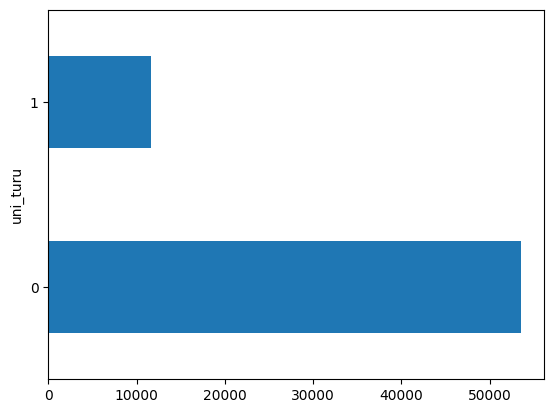

In [53]:
df_train['uni_turu'].value_counts().plot.barh()

### "burslu ise burs yüzdesi" bölümü

In [54]:
df_train['burs_yuzdesi'].unique()

array([100. ,  99. ,  98. ,  91.5,  90. ,  88. ,  87.5,  85. ,  82.5,
        80. ,  75. ,  74. ,  72. ,  70. ,  69. ,  67.5,  67. ,  65. ,
        64. ,  63. ,  62.5,  62. ,  60. ,  57.5,  57. ,  55. ,  50. ,
        49. ,  48. ,  46. ,  45. ,  41.5,  41. ,  40. ,  37. ,  35. ,
        32. ,  30. ,  25. ,  20. ,  11. ,  10. ,   8. ,   7. ,   6. ,
         5. ,   4. ,   3. ,   2. ,   1. ,   0. ,   nan])

In [55]:
df_train['burs_yuzdesi'].isnull().sum()

42685

In [56]:
df_train['burs_yuzdesi'] = df_train['burs_yuzdesi'].fillna(0)

In [57]:
df_train['burs_yuzdesi'] = pd.to_numeric(df_train['burs_yuzdesi'], errors='coerce')

In [58]:
def categorize_burs_yuzdesi(yuzde):
    if pd.isna(yuzde):  # 
        return 'yok' # yukarıda da gördüğümüz üzere burs yüzdesi bu aralıkta 
    elif yuzde == 0: # bunları belirli ölçütlerde düzenleyerek analiz yapmaya uygun hale getiriyoruz
        return 'yok'
    elif 25 <= yuzde < 50:
        return 'az'
    elif yuzde == 100:
        return 'full'
    elif 50 <= yuzde < 65:
        return 'orta'
    elif 65 <= yuzde < 75:
        return 'orta üst'
    else:
        return 'yüksek'

df_train['burs_yuzdesi'] = df_train['burs_yuzdesi'].apply(categorize_burs_yuzdesi)

df_train['burs_yuzdesi']=df_train['burs_yuzdesi'].map({'full':5, 'yüksek':4, 'orta üst':3, 'orta':2, 'az':1, 'yok':0})
df_train['burs_yuzdesi']=df_train['burs_yuzdesi'].astype(int) # yukarıda görüldüğü üzere atamaları yaptık.
# bu yaptığımız genel olarak makine öğrenmesi için 'değerlendirme puanını' etkileyen sütunları için gerçekleştiriliyor.

### "Burs alıyor mu" bölümü

In [59]:
df_train['bursu_varmi'].unique()

array(['Evet', 'Hayır', 'hayır', 'evet', 'EVET'], dtype=object)

In [60]:
df_train['bursu_varmi'].isnull().sum()

0

In [61]:
df_train['bursu_varmi'] = df_train['bursu_varmi'].str.lower()

In [62]:
df_train['bursu_varmi'].unique()

array(['evet', 'hayır'], dtype=object)

In [63]:
burs_a = {'evet': 1, 'hayır': 0}

df_train['bursu_varmi'] = df_train['bursu_varmi'].map(burs_a).astype(int)

### "Bölüm" bölümü

In [64]:
df_train['bolum'].unique()

array(['Bilgisayar Muhendisligi', 'Elektrik Elektronik Mühendisliği',
       'Finans Yönetimi ve Pazarlama', ...,
       'Yiyecek ve İçecek İşletmeciliği', 'İslam İktisadı ve Finans',
       'Nanoteknoloji Mühendisliği'], dtype=object)

In [65]:
df_train['bolum'].isnull().sum()

231

In [66]:
df_train['bolum'] = df_train['bolum'].fillna('yok')

In [67]:
bolumler_2 = pd.read_csv("bolumler.csv")

bolumler_2.head(5)  # burada farklı bir notebook'ta internetten veri çekme işlemi uyguladım
# bölüm sütunu da çok düzensiz olduğu için hızlı şekilde müdahale edebilmek adına
# internette türkiye'deki tüm üniversite bölümleri verilerinin olduğu bir siteden request ve beautifulsoap gibi kütüphaneler kullanarak
# veriyi çekip csv dosyasına aktardım.

,Bölüm İsimleri
0,Acil Durum ve Afet Yönetimi
1,Acil Durum ve Afet Yönetimi (Açıköğretim)
2,Acil Yardım ve Afet Yönetimi (Fakülte)
3,Acil Yardım ve Afet Yönetimi (Yüksekokul)
4,Adalet


In [68]:
bolum_i = bolumler_2['Bölüm İsimleri']

bolum_i.head()

0                  Acil Durum ve Afet Yönetimi
1    Acil Durum ve Afet Yönetimi (Açıköğretim)
2       Acil Yardım ve Afet Yönetimi (Fakülte)
3    Acil Yardım ve Afet Yönetimi (Yüksekokul)
4                                       Adalet
Name: Bölüm İsimleri, dtype: object

In [69]:
def temizle_bolum(bolum2):
    if pd.isna(bolum2):
        return None
    if isinstance(bolum2, str):
        bolum2 = bolum2.lower()
        bolum2 = bolum2.strip()

        for bol in bolum_i:
            if bol.lower() in bolum2:
                return bol
    return None # böylelikle yine aynı işlem ile bölümleri temizledim.

In [70]:
df_train["bolum"] = df_train["bolum"].apply(temizle_bolum)

In [71]:
# df_train['bolum'] = df_train['bolum'].str.lower().str.translate(turkish_characters)

In [72]:
# df_train['bolum'] = df_train['bolum'].replace('[^a-z\s]', '', regex=True)

In [73]:
#df_train['bolum'] = df_train['bolum'].str.replace('\s+', ' ', regex=True).str.strip()

In [74]:
df_train['bolum'].value_counts()

bolum
İşletme                                      4470
Endüstri Mühendisliği                        3373
Elektrik                                     2714
Bilgisayar Mühendisliği                      2669
Hukuk                                        2453
                                             ... 
Nanobilim ve Nanoteknoloji                      1
Kanatlı Hayvan Yetiştiriciliği                  1
Sahne ve Dekor Tasarımı                         1
Küresel Siyaset ve Uluslararası İlişkiler       1
Nanoteknoloji Mühendisliği                      1
Name: count, Length: 327, dtype: int64

In [75]:
df_train['bolum'] = le.fit_transform(df_train['bolum'])

### "Universite Kacinci Sinif" bölümü

In [76]:
df_train['uni_kacinci_sinif'].unique()

array(['3', '1', nan, '2', '4', 'Hazırlık', 'Mezun', 'hazırlık',
       'Yüksek Lisans', '5', '6', 'Tez', '0'], dtype=object)

In [77]:
df_train['uni_kacinci_sinif'].isnull().sum()

374

In [78]:
df_train['uni_kacinci_sinif'] = df_train['uni_kacinci_sinif'].str.lower()
df_train['uni_kacinci_sinif'] = df_train['uni_kacinci_sinif'].fillna('yok')

In [79]:
uni_sin_map = {'1': 1, '2': 2, '3': 3,'4': 4, '5': 5,'6':6,'yüksek lisans':0,'tez':0,'mezun':0,"hazırlık":0, "0":0, "yok": 0}

df_train['uni_kacinci_sinif'] = df_train['uni_kacinci_sinif'].map(uni_sin_map).astype(int)

### "Universite Not Ortalamasi" bölümü

In [80]:
df_train['uni_not_ort'].unique()

array(['3.50-3', '3.00-2.50', nan, '2.50 ve altı', '3.00 - 4.00',
       '3.50 - 4.00', '3.00 - 3.50', '2.50 -3.00', 'Ortalama bulunmuyor',
       'ORTALAMA BULUNMUYOR', '4-3.5', '2.50 - 3.00', '2.00 - 2.50',
       '1.00 - 2.50', 'Not ortalaması yok', '4.0-3.5', '3.00 - 3.49',
       '2.50 - 2.99', '1.80 - 2.49', 'Hazırlığım', '0 - 1.79'],
      dtype=object)

In [81]:
df_train['uni_not_ort'].isnull().sum()

2753

In [82]:
df_train['uni_not_ort'] = df_train['uni_not_ort'].str.lower()
df_train['uni_not_ort'] = df_train['uni_not_ort'].fillna('yok')

In [83]:
uni_not_mapping = {
    'hazırlığım': 0,
    'ortalama bulunmuyor': 0,
    'not ortalaması yok': 0,
    'yok':0,
    '0 - 1.79': 0,
    '1.00 - 2.50':1,
    '1.80 - 2.49':1,
    '2.50 ve altı':1,
    '2.00 - 2.50':1,
    "3.00-2.50":2,
    "2.50 - 3.00":2,
    "2.50 - 2.99":2,
    '2.50 -3.00':2,
    '3.00 - 3.50':3,
    '3.50-3':3,
    '3.00 - 3.49':3,
    '3.00 - 4.00':3,
    '3.50 - 4.00':4,
    '4-3.5':4,
    '4.0-3.5':4
}

df_train['uni_not_ort'] = df_train['uni_not_ort'].map(uni_not_mapping).astype(int)

### "Daha Once Baska Bir Universiteden Mezun Olmus" bölümü

In [84]:
df_train['baska_uni_mezunmu'].unique()

array(['Hayır', 'Evet', nan], dtype=object)

In [85]:
df_train['baska_uni_mezunmu'].isnull().sum()

37345

In [86]:
df_train['baska_uni_mezunmu'] = df_train['baska_uni_mezunmu'].str.lower()
df_train['baska_uni_mezunmu'] = df_train['baska_uni_mezunmu'].fillna('hayır')

In [87]:
baska_uni = {'evet': 1, 'hayır': 0}

df_train['baska_uni_mezunmu'] = df_train['baska_uni_mezunmu'].map(baska_uni).astype(int)

In [88]:
df_train['uni_not_ort'].unique()

array([3, 2, 0, 1, 4])

### "Lise Adi" bölümü

In [89]:
df_train['lise_adi'].unique()

array(['Ankara Ataturk Anadolu Lisesi', 'Betül Can Anadolu Lisesi',
       'Batem', ...,
       'BAĞCILAR EDİP İPLİK MESLEKİ VE TEKNİK ANADOLU LİSESİ',
       'Ahmet Vefik paşa Anadolu lisesi',
       'Samsun Terme Karadeniz mesleki teknik Anadolu lisesi'],
      dtype=object)

In [90]:
df_train['lise_adi'].isnull().sum()

384

In [91]:
df_train['lise_adi'] = df_train['lise_adi'].str.lower().str.translate(turkish_characters)

In [92]:
df_train['lise_adi'] = df_train['lise_adi'].replace('[^a-z\s]', '', regex=True)
df_train['lise_adi'] = df_train['lise_adi'].fillna('yok')

In [93]:
df_train['lise_adi'] = df_train['lise_adi'].str.replace('\s+', ' ', regex=True).str.strip()

In [94]:
df_train['lise_adi'].value_counts()

lise_adi
                                                        4272
acik ogretim lisesi                                      387
yok                                                      386
ataturk lisesi                                           273
cumhuriyet anadolu lisesi                                266
                                                        ... 
persembe anadolu otelcilik ve turizm meslek lisesi         1
suruc yunus emre anadolu lisesi                            1
kochisar                                                   1
safranbolu fatih anadolu lisesi                            1
samsun terme karadeniz mesleki teknik anadolu lisesi       1
Name: count, Length: 21921, dtype: int64

In [95]:
df_train['lise_adi'] = le.fit_transform(df_train['lise_adi'])

### "Lise Adi Diger" bölümü

In [96]:
df_train['lise_diger'].unique()

array([nan, 'İstanbul Alman Lisesi', 'şehzade mehmet koleji', ...,
       'Gençosman İmkb tml', 'nefise andicen lisesi',
       'büyük çiğli anadolu lisesi'], dtype=object)

In [97]:
df_train['lise_diger'].isnull().sum()

60392

In [98]:
df_train['lise_diger'] = df_train['lise_diger'].str.lower().str.translate(turkish_characters)

In [99]:
df_train['lise_diger'] = df_train['lise_diger'].replace('[^a-z\s]', '', regex=True)
df_train['lise_diger'] = df_train['lise_diger'].fillna('yok')

In [100]:
df_train['lise_diger'] = df_train['lise_diger'].str.replace('\s+', ' ', regex=True).str.strip()

In [101]:
df_train['lise_diger'] = le.fit_transform(df_train['lise_diger'])

### "Lise Sehir" bölümü

In [102]:
df_train['lise_sehir'].unique()

array(['Ankara', 'Diyarbakır', 'ANKARA', 'İstanbul', 'sivas', 'Kayseri',
       'İzmir', 'Trabzon', 'Anamur/MERSİN', 'İSTANBUL', 'Kars',
       'kahramanmaas', 'Konya', 'Kırşehir', 'İstanbul Anadolu',
       'Eskişehir', 'izmir', 'Mersin', 'Adana', 'istanbul', 'Sakarya',
       'Osmaniye', 'Istanbul', 'Antalya', 'Erzurum', 'malatya', 'Bolu',
       'Afyonkarahisar', 'Çanakkale', 'sakarya', 'Gemlik', 'ankara',
       'Ordu', 'antalya', 'ISTANBUL', 'Bartın', 'Aksaray', 'Zile',
       'Samsun', 'Bingöl', 'BURSA', 'ANTALYA', 'Samsun / Bafra',
       'Balıkesir', 'BALIKESİR', 'Bursa', 'Manisa-Turgutlu', 'Soma',
       'Aydın', 'bursa', 'samsun', 'KOCAELİ', 'karabük', 'Bilecik',
       'Izmir', 'İSTANBUL - BEŞİKTAŞ', 'Kocaeli', 'Kütahya', 'diyarbakir',
       'Kırklareli', 'Nazilli / Aydın', 'Tekirdağ', 'ANTAYA', 'Manisa',
       'Sivas', 'İZMİR', 'çorum', 'SAMSUN', 'ABD Missouri',
       'Zonguldak Ereğli', 'aydın', 'MANİSA', 'Mugla', 'Zonguldak',
       'KÜRKCÜ', 'Tokat Merkez', 'gaziantep

In [103]:
df_train['lise_sehir'].isnull().sum()

1054

In [104]:
df_train["lise_sehir"] = df_train["lise_sehir"].apply(temizle_sehir)

In [105]:
df_train['lise_sehir'] = df_train['lise_sehir'].fillna('yok')

In [106]:
df_train['lise_sehir'] = le.fit_transform(df_train['lise_sehir'])

### "Lise Turu" bölümü

In [107]:
df_train['lise_turu'].unique()

array(['Anadolu lisesi', 'Meslek lisesi', 'Fen lisesi', 'Özel lisesi',
       'Düz lise', 'İmam Hatip Lisesi', 'Meslek Lisesi', 'Fen Lisesi',
       'Düz Lise', 'Anadolu Lisesi', 'Özel Lise', nan, 'Özel Lisesi',
       'Diğer', 'Özel', 'Meslek', 'Devlet'], dtype=object)

In [108]:
df_train['lise_turu'].isnull().sum()

847

In [109]:
df_train['lise_turu'] = df_train['lise_turu'].str.lower()
df_train['lise_turu'] = df_train['lise_turu'].fillna('yok')

In [110]:
lise_turu_map = {'i̇mam hatip lisesi': 0, 'diğer': 0, 'devlet': 0,'düz lise': 0,
                 'yok': 0, 'meslek lisesi':0,'meslek':0,'özel':1,"özel lisesi":1,
                 "özel lise":1,'anadolu lisesi':0, 'fen lisesi':0}

df_train['lise_turu'] = df_train['lise_turu'].map(lise_turu_map).astype(int)

### "Lise Bolumu" bölümü

In [111]:
df_train['lise_bolumu'].unique()

array(['MF', 'Elektirk', 'Sayısal', 'TM', 'EA', 'TS 1-2', 'Fen',
       'Düz lise', 'sayısal', 'Elektrikli Ev Aletleri', 'EŞIT AĞIRLIK',
       'TS', 'Eşit Ağırlık', 'Matematik - Fen', 'Fen matematik',
       'Matematik Fen', 'Eşit ağırlık', 'türkçe ve matematik',
       'KONAKLAMA VE SEYAHAT HİZMETLERİ', 'Esit Agirlik',
       'Fen - Matematik', 'Türkçe - Matematik', 'esıt agırlık',
       'Bilişim Teknolojileri', 'Tm', 'Fen-Matematik', 'Sayisal',
       'Fen Bilimleri', 'türkçe-matematik', 'Sayisal MF',
       'Türkçe-Matematik', 'tm', 'matematik-fen', 'yok',
       '1 yıl TS , 2 yıl TM', 'Sözel', 'Matematik-Fen', 'esit agirlik',
       'Turkce matematil', 'Mf', 'Sosyal bilimler', 'EŞİT AĞIRLIK',
       'FEN-MATEMATİK', 'FEN BİLİMLERİ',
       'Sayısal Matematik - Fen Bilimleri MF', 'Matematik/Fen', 'SAYISAL',
       'eşit ağırlık', 'FM', 'eşit agırlık', 'sözel', 'Türkçe matematik',
       'eşit ağirlik', 'Grafik Ve Fotoğraf', 'fen', 'türkçe matematik',
       'TMSSosyal Bilimler Lis

In [112]:
df_train['lise_bolumu'].isnull().sum()

1009

In [113]:
df_train['lise_bolumu'] = df_train['lise_bolumu'].str.lower().str.translate(turkish_characters)

In [114]:
df_train['lise_bolumu'] = df_train['lise_bolumu'].replace('[^a-z\s]', '', regex=True)
df_train['lise_bolumu'] = df_train['lise_bolumu'].fillna('yok')

In [115]:
df_train['lise_bolumu'] = df_train['lise_bolumu'].str.replace('\s+', ' ', regex=True).str.strip()

In [116]:
df_train['lise_bolumu'] = le.fit_transform(df_train['lise_bolumu'])

### "Lise Bolum Diger" bölümü

In [117]:
df_train['lise_bolum_diger'].unique()

array([nan, '-', 'ÖZEL FEN LİSESİ',
       'Sosyal Bilimleri Lisesi seçeneği koymadığınız için Fen Lisesi sekmesini işaretledim.',
       'Grafik Ve Fotoğraf', 'Bilişim Teknolojileri', 'mezuniyet notu:80',
       'Çocuk gelişimi ve eğitimi', 'yabancı dili:almanca', 'Ticaret',
       'devlet lisesi', 'Bilgisayarlı Muhasebe bölümü',
       'Güverte Yönetimi', 'Gazetecilik', 'Bakalorya programı',
       'Eşit ağırlık devlet lisesi', 'Bilgisayarlı Muhasebe',
       'Alman Bölümü', 'Muhasebe ve Finansman', 'ANADOLU ÖĞRETMEN LİSESİ',
       'turizm ve otelcilik', 'dil bölümü', 'halkla ilişkiler',
       'IB High level : Fizik Matematik', 'Pazarlama', 'MUHASEBE',
       'İnşaat Teknolojisi', 'ACİL TIP TEKNİKERLİĞİ',
       'Grafik Tasarım ve Fotoğrafçılık', 'elektrik ve elektronik',
       'görüntü ve ses', 'Uluslararası Bakalorya Diploma Programı',
       'ÇOCUK GELİŞİMİ',
       'İlk üç sene sayısal (1 yıl International Baccalaureate), son yıl regular programda eşit ağırlık',
       'Genel'

In [118]:
df_train['lise_bolum_diger'].isnull().sum()

63599

In [119]:
df_train['lise_bolum_diger'] = df_train['lise_bolum_diger'].replace('[^a-z\s]', '', regex=True)
df_train['lise_bolum_diger'] = df_train['lise_bolum_diger'].fillna('yok')

In [120]:
df_train['lise_bolum_diger'] = df_train['lise_bolum_diger'].str.replace('\s+', ' ', regex=True).str.strip()

In [121]:
df_train['lise_bolum_diger'] = le.fit_transform(df_train['lise_bolum_diger'])

### "Lise Mezuniyet Notu" bölümü

In [122]:
df_train['lise_mez_notu'].unique()

array(['3.50-3', '3.00 - 4.00', '3.00-2.50', '2.50 ve altı', '4.00-3.50',
       '3.50-3.00', nan, '69-55', '100-85', '84-70', '54-45', '44-0',
       '75 - 100', '50 - 75', 'Not ortalaması yok', '25 - 50', '0 - 25',
       '50 - 74', '25 - 49', '0 - 24'], dtype=object)

In [123]:
df_train['lise_mez_notu'].isnull().sum()

5917

In [124]:
df_train['lise_mez_notu'] = df_train['lise_mez_notu'].fillna('yok')

In [125]:
# unknown_values = df_train[~df_train['lise_mez_notu'].isin(lise_not_mapping.keys())]['lise_mez_notu'].unique()

# print("Haritaya uymayan değerler:", unknown_values)

lise_not_mapping = {
    'Not ortalaması yok': 0,
    'yok': 0,
    '44-0': 0,
    '0 - 25': 0,
    '0 - 24': 0,
    '25 - 50': 0,
    '25 - 49': 0,
    '2.50 ve altı': 0,
    '54-45': 0,
    '69-55': 1,
    '3.00-2.50': 1,
    '50 - 74': 1,
    '50 - 75': 1,
    '3.00 - 4.00': 1,
    '3.50-3.00': 1,
    '3.50-3': 1,
    '84-70': 1,
    '75 - 100': 2,
    '100-85': 2,
    '4.00-3.50': 2,
}

df_train['lise_mez_notu'] = df_train['lise_mez_notu'].map(lise_not_mapping).astype(int)

### "Baska Bir Kurumdan Burs Aliyor mu?" bölümü

In [126]:
df_train['baska_burs_varmi'].unique()

array(['Hayır', 'Evet', nan], dtype=object)

In [127]:
df_train['baska_burs_varmi'].isnull().sum()

231

In [128]:
df_train['baska_burs_varmi'] = df_train['baska_burs_varmi'].str.lower()
df_train['baska_burs_varmi'] = df_train['baska_burs_varmi'].fillna('hayır')

In [129]:
baska_burs_map = {'evet': 1, 'hayır': 0}

df_train['baska_burs_varmi'] = df_train['baska_burs_varmi'].map(baska_burs_map).astype(int)

### "Burs Aldigi Baska Kurum" bölümü

In [130]:
df_train['burs_aldigi_kurum'].unique()

array([nan, 'kyk', 'KYK', ..., 'KYK/BURSKOOP', 'Nuh Çimento Vakfı',
       'KYK Yök bursu'], dtype=object)

In [131]:
df_train['burs_aldigi_kurum'].isnull().sum()

43977

In [132]:
df_train['burs_aldigi_kurum'].value_counts()

burs_aldigi_kurum
-                                         4711
KYK                                       2969
Kyk                                       2918
kyk                                        758
Kredi ve Yurtlar Kurumu                    624
                                          ... 
Kale Holding,Çanakkale Ticaret borsası       1
Akkim                                        1
Say Vakfı                                    1
KYK Geri odemeli kredi aliyorum              1
KYK Yök bursu                                1
Name: count, Length: 3959, dtype: int64

In [133]:
df_train['burs_aldigi_kurum'] = df_train['burs_aldigi_kurum'].str.lower().str.translate(turkish_characters)

In [134]:
df_train['burs_aldigi_kurum'] = df_train['burs_aldigi_kurum'].replace({'-': 'yok'})
df_train['burs_aldigi_kurum'] = df_train['burs_aldigi_kurum'].fillna('yok')

In [135]:
df_train['burs_aldigi_kurum'].value_counts()

burs_aldigi_kurum
yok                               48717
kyk                                6666
kredi ve yurtlar kurumu             896
kredi yurtlar kurumu                758
kyk bursu                           526
                                  ...  
kyk kredi bursu                       1
yuksekogretim kredi                   1
ordu golkoy cetilliler dernegi        1
biota vakfi                           1
kyk yok bursu                         1
Name: count, Length: 3255, dtype: int64

In [136]:
df_train['burs_aldigi_kurum'] = le.fit_transform(df_train['burs_aldigi_kurum'])

### "Baska Kurumdan Aldigi Burs Miktari" bölümü

In [137]:
df_train['bk_burs_miktari'].unique()

array([nan, '300', '300 TL', '150 TL', '430tlyılda 10 ay', '400',
       '250 TL',
       'Toplamda 1000 lira fakat mezun oldugun icin devam etmiyor',
       '850 TL', '500 TL', '300 tl', 'AYLIK 280 TL', '430', '1000 TL',
       '900 TL', '300 LİRA', '365', '500TL, 300TL', '125 TL', '850',
       '180', '260', '300 lira', '425 TL', 'aylık 100 tl',
       '300 TL nakit + yemek + ulaşım', '300TL', '250', '900', '150',
       '400 TL', '800', '300 tl aylık', '280', '400,00 TL', '200 TL',
       '430 tl', '500 TL - 300 TL', '400 tl', '325 TL', '300 TL / Aylık',
       '275 TLAYLIK', '10 ay süre ile aylık 600 TL', '500 tl ve 300 tl',
       '500 tl', 'BİN TÜRK LİRASI', '475', '300,0 tl', '675 TL',
       'kredi-300', 'Aylık 300 TL', '300-400', '750', '330 TL',
       'aylık 330 tl', '490', '320 TL', '560 TL',
       'Tam Burslu olduğum için yalnız eğitim ücreti ek burs almıyorum',
       '500', '600 TL/Yurt Bursu/Kitap Bursu', '430TL', '350', '600',
       '8 Ay Boyunca Aylık 720 TL', '330'

In [138]:
df_train['bk_burs_miktari'].isnull().sum()

44162

In [139]:
df_train['bk_burs_miktari'] = df_train['bk_burs_miktari'].fillna('0')

In [140]:
import re # burada re kütüphanesini dahil ediyoruz çünkü 'burs miktarı' yapısının içinden 'sayısal text'leri çekmemiz gerek
# geri kalan her şey gereksiz çünkü. Çektikten sonra veriyi int veritipine dönüştürüp makine öğrenmesine uygun hale getiriyoruz.
def extract_numbers(text):
    if isinstance(text, str):
        numbers = re.findall(r'\d+', text)
        return int(max(numbers, key=int)) if numbers else 0
    return 0

df_train['bk_burs_miktari'] = df_train['bk_burs_miktari'].apply(extract_numbers)

### "Anne Egitim Durumu" bölümü

In [141]:
df_train['a_egitim_durumu'].unique()

array(['Üniversite', 'İlkokul Mezunu', 'Eğitim Yok', 'Lise',
       'Ortaokul Mezunu', 'Yüksek Lisans / Doktora', 'Üniversite Mezunu',
       'Lise Mezunu', 'Yüksek Lisans / Doktara', 'İLKOKUL MEZUNU', 'LİSE',
       'EĞİTİM YOK', nan, 'ÜNİVERSİTE', 'ORTAOKUL MEZUNU', 'DOKTORA',
       'YÜKSEK LİSANS', 'Ortaokul', 'İlkokul', 'Yüksek Lisans',
       'Eğitimi yok', 'Doktora'], dtype=object)

In [142]:
df_train['a_egitim_durumu'].isnull().sum()

406

In [143]:
df_train['a_egitim_durumu'] = df_train['a_egitim_durumu'].str.lower().replace('[,/-]', ' ', regex=True).str.strip()
df_train['a_egitim_durumu'] = df_train['a_egitim_durumu'].fillna('eğitim yok')

In [144]:
df_train['a_egitim_durumu'].unique()

array(['üniversite', 'i̇lkokul mezunu', 'eğitim yok', 'lise',
       'ortaokul mezunu', 'yüksek lisans   doktora', 'üniversite mezunu',
       'lise mezunu', 'yüksek lisans   doktara', 'li̇se', 'eği̇ti̇m yok',
       'üni̇versi̇te', 'doktora', 'yüksek li̇sans', 'ortaokul',
       'i̇lkokul', 'yüksek lisans', 'eğitimi yok'], dtype=object)

In [145]:
# unknown_values = df_train[~df_train['a_egitim_durumu'].isin(anne_egitim_mapping.keys())]['a_egitim_durumu'].unique()

# print("Haritaya uymayan değerler:", unknown_values) # bu yaptığım kısım map için hata aldığımızda nereyi eksik veya yanlış yazmışım onu görmek adına.

anne_egitim_mapping = {'eğitim yok': 0,
                      'eğitimi yok': 0,
                      'eği̇ti̇m yok':0,
                      'i̇lkokul': 1,
                      'i̇lkokul mezunu':1,
                      'ortaokul mezunu': 2,
                      'ortaokul': 2,
                      'lise mezunu': 3,
                      'lise': 3,
                      'li̇se': 3,
                      'üniversite':4,
                      'üniversite mezunu':4,
                      'üni̇versi̇te': 4,
                      'yüksek lisans   doktora':5,
                      'yüksek lisans   doktara':5,
                      'doktora':5,
                      'yüksek li̇sans':5,
                      'yüksek lisans':5}

df_train['a_egitim_durumu'] = df_train['a_egitim_durumu'].map(anne_egitim_mapping).astype(int)

### "Anne Calisma Durumu" bölümü

In [146]:
df_train['a_calisma_durumu'].unique()

array(['Hayır', 'Evet', 'Emekli', nan], dtype=object)

In [147]:
df_train['a_calisma_durumu'].isnull().sum()

11896

In [148]:
df_train['a_calisma_durumu'] = df_train['a_calisma_durumu'].str.lower()
df_train['a_calisma_durumu'] = df_train['a_calisma_durumu'].fillna('hayır')

In [149]:
a_calisma_map = {'evet': 1, 'hayır': 0, 'emekli': 2}

df_train['a_calisma_durumu'] = df_train['a_calisma_durumu'].map(a_calisma_map).astype(int)

### "Anne Sektor" bölümü

In [150]:
df_train['a_sektor'].unique()

array(['0', 'Kamu', 'Özel Sektör', 'Diğer', nan, 'KAMU', 'ÖZEL SEKTÖR',
       'DİĞER', '-'], dtype=object)

In [151]:
df_train['a_sektor'].isnull().sum()

34537

In [152]:
df_train['a_sektor'] = df_train['a_sektor'].str.lower()
df_train['a_sektor'] = df_train['a_sektor'].fillna('yok')

In [153]:
df_train['a_sektor'].unique()

array(['0', 'kamu', 'özel sektör', 'diğer', 'yok', 'di̇ğer', '-'],
      dtype=object)

In [154]:
a_sektor_map = {'0': 0,
               'yok': 0,
               '-': 0,
               'diğer': 1,
               'di̇ğer': 1,
               'kamu': 2,
               'özel sektör': 3}

df_train['a_sektor'] = df_train['a_sektor'].map(a_sektor_map).astype(int)

### "Baba Egitim Durumu" bölümü

In [155]:
df_train['b_egitim_durumu'].unique()

array(['Üniversite', 'Yüksek Lisans / Doktora', 'İlkokul Mezunu', nan,
       'Ortaokul Mezunu', 'Lise', 'Eğitim Yok', '0', 'Üniversite Mezunu',
       'Lise Mezunu', 'Yüksek Lisans / Doktara', 'İLKOKUL MEZUNU',
       'ÜNİVERSİTE', 'EĞİTİM YOK', 'ORTAOKUL MEZUNU', 'LİSE',
       'YÜKSEK LİSANS', 'DOKTORA', 'İlkokul', 'Ortaokul', 'Doktora',
       'Yüksek Lisans', 'Eğitimi yok'], dtype=object)

In [156]:
df_train['b_egitim_durumu'].isnull().sum()

1007

In [157]:
df_train['b_egitim_durumu'] = df_train['b_egitim_durumu'].str.lower().replace('[,/-]', ' ', regex=True).str.strip()
df_train['b_egitim_durumu'] = df_train['b_egitim_durumu'].fillna('eğitim yok')

In [158]:
df_train['b_egitim_durumu'].unique()

array(['üniversite', 'yüksek lisans   doktora', 'i̇lkokul mezunu',
       'eğitim yok', 'ortaokul mezunu', 'lise', '0', 'üniversite mezunu',
       'lise mezunu', 'yüksek lisans   doktara', 'üni̇versi̇te',
       'eği̇ti̇m yok', 'li̇se', 'yüksek li̇sans', 'doktora', 'i̇lkokul',
       'ortaokul', 'yüksek lisans', 'eğitimi yok'], dtype=object)

In [159]:
# unknown_values = df_train[~df_train['a_egitim_durumu'].isin(anne_egitim_mapping.keys())]['a_egitim_durumu'].unique()

# print("Haritaya uymayan değerler:", unknown_values)

b_egitim_map = {'eğitim yok': 0,
                '0': 0,
                      'eğitimi yok': 0,
                      'eği̇ti̇m yok':0,
                      'i̇lkokul': 1,
                      'i̇lkokul mezunu':1,
                      'ortaokul mezunu': 2,
                      'ortaokul': 2,
                      'lise mezunu': 3,
                      'lise': 3,
                      'li̇se': 3,
                      'üniversite':4,
                      'üniversite mezunu':4,
                      'üni̇versi̇te': 4,
                      'yüksek lisans   doktora':5,
                      'yüksek lisans   doktara':5,
                      'doktora':5,
                      'yüksek li̇sans':5,
                      'yüksek lisans':5}

df_train['b_egitim_durumu'] = df_train['b_egitim_durumu'].map(b_egitim_map).astype(int)

In [160]:
df_train['b_egitim_durumu'].unique()

array([4, 5, 1, 0, 2, 3])

### "Baba Calisma Durumu" bölümü

In [161]:
df_train['b_calisma_durumu'].unique()

array(['Emekli', 'Evet', nan, 'Hayır'], dtype=object)

In [162]:
df_train['b_calisma_durumu'].isnull().sum()

12618

In [163]:
df_train['b_calisma_durumu'] = df_train['b_calisma_durumu'].str.lower()
df_train['b_calisma_durumu'] = df_train['b_calisma_durumu'].fillna('hayır')

In [164]:
b_calisma_map = {'evet': 1, 'hayır': 0, 'emekli': 2}

df_train['b_calisma_durumu'] = df_train['b_calisma_durumu'].map(b_calisma_map).astype(int)

### "Baba Sektor" bölümü

In [165]:
df_train['b_sektor'].unique()

array(['0', 'Özel Sektör', 'Kamu', nan, 'Diğer', 'KAMU', 'DİĞER',
       'ÖZEL SEKTÖR', '-'], dtype=object)

In [166]:
df_train['b_sektor'].isnull().sum()

20378

In [167]:
df_train['b_sektor'] = df_train['b_sektor'].str.lower()
df_train['b_sektor'] = df_train['b_sektor'].fillna('yok')

In [168]:
df_train['b_sektor'].unique()

array(['0', 'özel sektör', 'kamu', 'yok', 'diğer', 'di̇ğer', '-'],
      dtype=object)

In [169]:
b_sektor_map = {'0': 0,
               'yok': 0,
               '-': 0,
               'diğer': 1,
               'di̇ğer': 1,
               'kamu': 2,
               'özel sektör': 3}

df_train['b_sektor'] = df_train['b_sektor'].map(b_sektor_map).astype(int)

### "Kardes Sayisi" bölümü

In [170]:
df_train['k_sayisi'].unique()

array(['1', '6', '10', '3', nan, '4', '2', '5', '0', '7', '8', '11', '9',
       '12', '13', 'Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat', '18',
       '14', 4.0, 5.0, 1.0, 2.0, 6.0, 3.0, 9.0, 0.0, 10.0, 7.0, 8.0],
      dtype=object)

In [171]:
df_train['k_sayisi'].isnull().sum()

1132

In [172]:
df_train['k_sayisi'] = df_train['k_sayisi'].fillna('1')

In [173]:
df_train['k_sayisi'] = df_train['k_sayisi'].replace({'Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat': '1'})

In [174]:
df_train['k_sayisi'] = df_train['k_sayisi'].astype(int)

In [175]:
df_train['k_sayisi'].value_counts()

k_sayisi
1     23373
2     17000
3      8821
4      5609
0      5082
5      4136
6       341
7       278
8       173
10      169
9       122
11       12
12        5
13        2
18        1
14        1
Name: count, dtype: int64

### "Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?" bölümü

In [176]:
df_train['gir_klube_uyemi'].unique()

array(['Evet', 'Hayır', nan], dtype=object)

In [177]:
df_train['gir_klube_uyemi'].isnull().sum()

1829

In [178]:
df_train['gir_klube_uyemi'] = df_train['gir_klube_uyemi'].str.lower()
df_train['gir_klube_uyemi'] = df_train['gir_klube_uyemi'].fillna('hayır')

In [179]:
gir_uyemi_map = {'evet': 1, 'hayır': 0,}

df_train['gir_klube_uyemi'] = df_train['gir_klube_uyemi'].map(gir_uyemi_map).astype(int)

### "Uye Oldugunuz Kulubun Ismi" bölümü

In [180]:
df_train['kulup_ismi'].unique()

array(['Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Baskani', nan, 'Tema',
       ..., 'Resim(karakalem),Müzik(Ney) Kulüpleri', 'Kocaeli',
       'Genç Kızılay'], dtype=object)

In [181]:
df_train['kulup_ismi'].isnull().sum()

48691

In [182]:
df_train['kulup_ismi'] = df_train['kulup_ismi'].str.lower()
df_train['kulup_ismi'] = df_train['kulup_ismi'].fillna('yok')

In [183]:
df_train['kulup_ismi'] = df_train['kulup_ismi'].str.translate(turkish_characters)

In [184]:
df_train['kulup_ismi'].value_counts()

kulup_ismi
yok                                                                                 48693
ieee                                                                                  230
girisimcilik kulubu                                                                   115
i̇sletme kulubu                                                                        71
aiesec                                                                                 62
                                                                                    ...  
kontrol ve otomasyon klubu                                                              1
genc-i̇mo, insaat klubu, tog                                                            1
yildiz teknik universitesi i̇sletme klubu, yildiz teknik universitesi spor klubu        1
bilim ve teknoloji toplulugu , cevre toplulugu , hip-hop dans toplulugu                 1
genc kizilay                                                                            1

In [185]:
df_train['kulup_ismi'] = le.fit_transform(df_train['kulup_ismi'])

### "Profesyonel Bir Spor Daliyla Mesgul musunuz?" bölümü

In [186]:
df_train['spor_dali_mesgulmu'].unique()

array(['Evet', 'Hayır', nan], dtype=object)

In [187]:
df_train['spor_dali_mesgulmu'].isnull().sum()

1115

In [188]:
df_train['spor_dali_mesgulmu'] = df_train['spor_dali_mesgulmu'].str.lower()
df_train['spor_dali_mesgulmu'] = df_train['spor_dali_mesgulmu'].fillna('hayır')

In [189]:
spor_mesgulmu_map = {'evet': 1, 'hayır': 0,}

df_train['spor_dali_mesgulmu'] = df_train['spor_dali_mesgulmu'].map(spor_mesgulmu_map).astype(int)

### "Spor Dalindaki Rolunuz Nedir?" bölümü

In [190]:
df_train['spor_rolu_ne'].unique()

array(['Diğer', '0', nan, 'Kaptan', 'KAPTAN / LİDER', 'DİĞER',
       'Lider/Kaptan', 'Bireysel', 'Takım Oyuncusu', '-'], dtype=object)

In [191]:
df_train['spor_rolu_ne'].isnull().sum()

32275

In [192]:
df_train['spor_rolu_ne'] = df_train['spor_rolu_ne'].str.lower().replace('[,/]', ' ', regex=True).str.strip()
df_train['spor_rolu_ne'] = df_train['spor_rolu_ne'].fillna('-')

In [193]:
df_train['spor_rolu_ne'].unique()

array(['diğer', '0', '-', 'kaptan', 'kaptan   li̇der', 'di̇ğer',
       'lider kaptan', 'bireysel', 'takım oyuncusu'], dtype=object)

In [194]:
spor_rolune_map = {
    '0': 0,
    '-': 0,
    'diğer': 1,
    'di̇ğer': 1,
    'kaptan':2,
    'kaptan   li̇der':2,
    'lider kaptan':2,
    'bireysel':3,
    'takım oyuncusu':4
}

df_train['spor_rolu_ne'] = df_train['spor_rolu_ne'].map(spor_rolune_map).astype(int)

### "Aktif olarak bir STK üyesi misiniz?" bölümü

In [195]:
df_train['aktif_stk_uyesimi'].unique()

array(['Hayır', nan, 'Evet'], dtype=object)

In [196]:
df_train['aktif_stk_uyesimi'].isnull().sum()

12842

In [197]:
df_train['aktif_stk_uyesimi'] = df_train['aktif_stk_uyesimi'].str.lower()
df_train['aktif_stk_uyesimi'] = df_train['aktif_stk_uyesimi'].fillna('hayır')

In [198]:
aktif_stk_map = {'evet': 1, 'hayır': 0,}

df_train['aktif_stk_uyesimi'] = df_train['aktif_stk_uyesimi'].map(aktif_stk_map).astype(int)

### "Hangi STK'nin Uyesisiniz?" bölümü

In [199]:
df_train['hangi_stk'].unique()

array([nan, 'Demokratikleşme çabaları', 'yüz yüze projesi', ...,
       "Düzenli bir şekilde Kızılay'a kan bağışı yapıyorum",
       'Gençlik merkezi ile beraber yapılan gönüllülük faaliyetinin bszilr',
       "Genç Kızılay Topluluğu'nda 3 yıldır gönüllüyüm. 1 yıl boyunca topluluğun yönetim kurulunda üye ilişkileri birimi sorumlusuydum. Şu an gönüllü olarak toplulukta aktifim."],
      dtype=object)

In [200]:
df_train['hangi_stk'].isnull().sum()

49518

In [201]:
df_train['hangi_stk'].value_counts()

hangi_stk
-                                                                                                                                                                           2956
Kızılay                                                                                                                                                                      238
Toplum Gönüllüleri Vakfı                                                                                                                                                     196
TEMA                                                                                                                                                                         181
LÖSEV                                                                                                                                                                        149
                                                                                                         

In [202]:
df_train['hangi_stk'] = df_train['hangi_stk'].str.translate(turkish_characters)

In [203]:
df_train['hangi_stk'] = df_train['hangi_stk'].str.lower().replace('[,/]', ' ', regex=True).str.strip()
df_train['hangi_stk'] = df_train['hangi_stk'].fillna('-')

In [204]:
df_train['hangi_stk'] = le.fit_transform(df_train['hangi_stk'])

### "Stk Projesine Katildiniz Mi?" bölümü

In [205]:
df_train['stk_proje_katildimi'].unique()

array(['Evet', 'Hayır', nan], dtype=object)

In [206]:
df_train['stk_proje_katildimi'].isnull().sum()

28308

In [207]:
df_train['stk_proje_katildimi'] = df_train['stk_proje_katildimi'].str.lower()
df_train['stk_proje_katildimi'] = df_train['stk_proje_katildimi'].fillna('hayır')

In [208]:
stk_proje_map = {'evet': 1, 'hayır': 0,}

df_train['stk_proje_katildimi'] = df_train['stk_proje_katildimi'].map(stk_proje_map).astype(int)

### "Girisimcilikle Ilgili Deneyiminiz Var Mi?" bölümü

In [209]:
df_train['gir_deneyim_varmi'].unique()

array(['Hayır', 'Evet', nan], dtype=object)

In [210]:
df_train['gir_deneyim_varmi'].isnull().sum()

12840

In [211]:
df_train['gir_deneyim_varmi'] = df_train['gir_deneyim_varmi'].str.lower()
df_train['gir_deneyim_varmi'] = df_train['gir_deneyim_varmi'].fillna('hayır')

In [212]:
gir_deneyim_map = {'evet': 1, 'hayır': 0,}

df_train['gir_deneyim_varmi'] = df_train['gir_deneyim_varmi'].map(gir_deneyim_map).astype(int)

### "Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?" bölümü

In [213]:
df_train['gir_deneyim_acikla'].unique()

array([nan,
       'Bilkent Cyberparkta bir şirkette Türkiye nin ilk ekonomik DNA görüntüleme cihazını yapmak için çalışmaya başladım.',
       'Konvansiyonel medyanın dönüşümüne ve tüketimin infografik efektler üzerinden gerçekleştirileceği bir format üzerinde çalışıyorum.',
       ...,
       "2019 yılından itibaren ''Hayali Olan Liseli'' Girişimcilik Ekibi'nde bulunmaktayım. Çeşitli eğitimler alarak birer mentör adayı olarak yetiştirildin, ekip arkadaşlarımla. Kurucumuz Cihan Buğdaycı'dır.",
       'Amazonda danışmanlık ve amazonda satış yapmak',
       'Aile desteğiyle yemek sektöründe küçük bir işletme açtık. Ablamla birlikte işletmenin yönetimini sağladık fakat ekonomik sebeplerden dolayı işletmeyi kapatmak mecburiyetinde kaldık.'],
      dtype=object)

In [214]:
df_train['gir_deneyim_acikla'].isnull().sum()

50526

In [215]:
df_train['gir_deneyim_acikla'] = df_train['gir_deneyim_acikla'].fillna('-')
df_train['gir_deneyim_acikla'] = df_train['gir_deneyim_acikla'].apply(lambda x: 0 if x == '-' else 1) # açıklama varsa 1 yoksa 0 olarak girmek için.
# yani buradaki verileri anlamlı bir şekilde ancak böyle kullanabiliriz. Birinin girişimcilik deneyimi varsa onun daha fazla şansı vardır
# mantığında sayısal olarak '1' verdik.

### "Ingilizce Biliyor musunuz?" bölümü

In [216]:
df_train['ing_varmi'].unique()

array([nan, 'Evet', 'Hayır'], dtype=object)

In [217]:
df_train['ing_varmi'].isnull().sum()

6454

In [218]:
df_train['ing_varmi'] = df_train['ing_varmi'].str.lower()
df_train['ing_varmi'] = df_train['ing_varmi'].fillna('hayır')

In [219]:
ing_varmi_map = {'evet': 1, 'hayır': 0,}

df_train['ing_varmi'] = df_train['ing_varmi'].map(ing_varmi_map).astype(int)

### "Ingilizce Seviyeniz?" bölümü;

In [220]:
df_train['ing_seviye'].unique()

array([nan, 'İleri', 'Orta', '0', 'Başlangıç'], dtype=object)

In [221]:
df_train['ing_seviye'].isnull().sum()

36533

In [222]:
df_train['ing_seviye'] = df_train['ing_seviye'].str.lower()
df_train['ing_seviye'] = df_train['ing_seviye'].fillna('0')

In [223]:
# unknown_values = df_train[~df_train['ing_seviye'].isin(ing_seviye_map.keys())]['ing_seviye'].unique()

# print("Haritaya uymayan değerler:", unknown_values)

ing_seviye_map = {'0': 0, 'başlangıç': 1, 'orta': 2, 'i̇leri': 3}

df_train['ing_seviye'] = df_train['ing_seviye'].map(ing_seviye_map).astype(int)

### "Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite " bölümü

In [224]:
df_train['ikinci_uni_varmi'].unique() # burada aşırı boş veri olduğu ve kullanmayacağım için çok müdahale etmedim. sadece nan değerleri doldurdum

array([nan, 'Sabancı Üniversitesi', 'Anadolu Üniversitesi',
       'Mimar Sinan Güzel Sanatlar Üniversitesi', 'Adıyaman Üniversitesi',
       'TOBB Ekonomi ve Teknoloji Üniversitesi', 'Yalova Üniversitesi',
       'İSTANBUL ÜNİVERSİTESİ', 'ATATÜRK ÜNİVERSİTESİ',
       'DOĞUŞ ÜNİVERSİTESİ', 'MARMARA ÜNİVERSİTESİ',
       'SAKARYA ÜNİVERSİTESİ', 'ÇANAKKALE ONSEKİZ MART',
       'KOCAELİ ÜNİVERSİTESİ', 'KARABÜK ÜNİVERSİTESİ',
       'ANADOLU ÜNİVERSİTESİ', 'ÇUKUROVA ÜNİVERSİTESİ',
       'İZMİR EKONOMİ ÜNİVERSİTESİ', 'TRAKYA ÜNİVERSİTESİ',
       'İSTANBUL KÜLTÜR ÜNİVERSİTESİ', 'ÜSKÜDAR ÜNİVERSİTESİ',
       'EGE ÜNİVERSİTESİ', 'OKAN ÜNİVERSİTESİ', 'BEYKOZ LOJİSTİK MESLEK',
       'Düzce Üniversitesi', 'Marmara Üniversitesi',
       'Bahçeşehir Üniversitesi', 'AVRASYA ÜNİVERSİTESİ',
       'PİRİ REİS ÜNİVERSİTESİ', 'İSTANBUL MEDİPOL ÜNİVERSİTESİ',
       'Çukurova Üniversitesi', 'Bozok Üniversitesi',
       'Siirt Üniversitesi', 'Yıldız Teknik Üniversitesi',
       'İstanbul Gelişim Üniv

In [225]:
df_train['ikinci_uni_varmi'].isnull().sum()

64706

In [226]:
df_train['ikinci_uni_varmi'] = df_train['ikinci_uni_varmi'].str.lower()
df_train['ikinci_uni_varmi'] = df_train['ikinci_uni_varmi'].fillna('yok')

In [227]:
df_train['ikinci_uni_varmi'] = le.fit_transform(df_train['ikinci_uni_varmi'])

## İşlemler

In [228]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   b_yili               65125 non-null  int64  
 1   D_puani              65125 non-null  float64
 2   cinsiyet             65125 non-null  int32  
 3   d_yeri               65125 non-null  int32  
 4   ikametgah            65125 non-null  int32  
 5   uni_adi              65125 non-null  int32  
 6   uni_turu             65125 non-null  int32  
 7   burs_yuzdesi         65125 non-null  int32  
 8   bursu_varmi          65125 non-null  int32  
 9   bolum                65125 non-null  int32  
 10  uni_kacinci_sinif    65125 non-null  int32  
 11  uni_not_ort          65125 non-null  int32  
 12  baska_uni_mezunmu    65125 non-null  int32  
 13  lise_adi             65125 non-null  int32  
 14  lise_diger           65125 non-null  int32  
 15  lise_sehir           65125 non-null 

In [229]:
df_train.drop(columns=['d_yeri', 'ikametgah', 'lise_adi','cinsiyet',
                      'burs_yuzdesi', 'lise_adi','lise_diger',
                      'lise_bolumu', 'baska_uni_mezunmu', 'lise_bolum_diger', 'kulup_ismi', 'lise_sehir',
                      'baska_burs_varmi', 'burs_aldigi_kurum', 'bk_burs_miktari', 'hangi_stk', 'ing_seviye', 'stk_proje_katildimi', 'ikinci_uni_varmi'], inplace=True)
# bu verileri düzenlememize rağmen gerek test datasında eksik olmasından gerek anlamsız olduğundan verisetinden çıkarıyoruz.

In [230]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

scaler = StandardScaler() # standart scaler ile birden fazla değişkenli sütunları standardize ediyoruz. makine öğrenmesine uygun olması için

df_train[[
       'uni_adi', 'uni_turu',
       'bolum']] = scaler.fit_transform(df_train[[
       'uni_adi', 'uni_turu',
       'bolum']])

In [231]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_train

,b_yili,D_puani,uni_adi,uni_turu,bursu_varmi,bolum,uni_kacinci_sinif,uni_not_ort,lise_turu,lise_mez_notu,a_egitim_durumu,a_calisma_durumu,a_sektor,b_egitim_durumu,b_calisma_durumu,b_sektor,k_sayisi,gir_klube_uyemi,spor_dali_mesgulmu,spor_rolu_ne,aktif_stk_uyesimi,gir_deneyim_varmi,gir_deneyim_acikla,ing_varmi,id,yil,yas,ay
0,2014,52.0,0.306247,2.147174,1,1.195041,3,3,0,1,4,0,0,4,2,0,1,1,1,1,0,0,0,0,0,1994,30,6
1,2014,30.0,0.306247,2.147174,0,-1.164822,3,2,0,1,4,1,2,5,2,0,1,0,0,0,0,1,1,0,1,1993,31,11
2,2014,18.0,0.306247,2.147174,0,-0.028235,1,0,0,1,1,0,0,1,1,3,6,1,0,0,0,0,0,0,2,2000,24,1
3,2014,40.0,0.306247,2.147174,1,-1.579002,3,2,0,1,1,0,0,4,2,0,10,1,0,0,0,0,0,0,3,1991,33,4
4,2014,24.0,0.306247,2.147174,1,0.270360,0,2,1,1,1,0,0,4,2,0,1,0,0,0,0,0,0,0,4,2000,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,2022,0.0,0.796832,2.147174,1,1.195041,2,0,0,1,1,0,0,2,1,3,4,0,0,0,0,0,0,0,65120,2000,24,1
65121,2022,0.0,-1.165509,-0.465729,0,1.175777,1,0,0,2,3,0,0,3,1,3,4,0,0,0,0,0,0,0,65121,2000,24,1
65122,2022,0.0,-0.380573,-0.465729,0,-0.066763,4,0,0,2,3,0,0,3,0,0,3,0,0,0,0,0,0,0,65122,2000,24,1
65123,2022,0.0,-1.983151,-0.465729,0,0.154775,3,0,0,1,1,1,3,3,1,2,2,0,0,0,0,0,0,0,65123,2000,24,1


In [232]:
# pip install lightgbm

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, Lars, LassoLars
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor, OrthogonalMatchingPursuit
from sklearn.dummy import DummyRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb
# çoğu makine öğrenmesi algoritmasının kütüphanesini dahil ediyoruz ki toplu şekilde gözlem yapabilmek adına.
# her bir modelin train datası için rmse değerini gözlemleyeceğiz.

X = df_train.drop(columns=['D_puani', 'id']) # tüm kategorik verilerimizi topladığımız bağımsız değişkenlerimiz
y = df_train['D_puani'] # üzerinden tahmin yürüteceğimiz bağımsız değişkenimiz

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train-test işlemleri

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Least Angle Regression': Lars(),
    'Lasso Least Angle Regression': LassoLars(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K Neighbors Regressor': KNeighborsRegressor(),
    'Huber Regressor': HuberRegressor(),
    'Orthogonal Matching Pursuit': OrthogonalMatchingPursuit(),
    'Dummy Regressor': DummyRegressor(strategy='mean'),
    'Extreme Gradient Boosting': xgb.XGBRegressor(),
    'Light Gradient Boosting Machine': lgb.LGBMRegressor(),
    'CatBoost Regressor': CatBoostRegressor(learning_rate=0.1, depth=6, iterations=500, verbose=0),
    'Hist Gradient Boosting Regressor': HistGradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f'{name}: RMSE = {rmse}')

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'RMSE'])
print(results_df.sort_values(by='RMSE'))

Linear Regression: RMSE = 9.853420139002527
Ridge Regression: RMSE = 9.84917727614351
Lasso Regression: RMSE = 10.927521005689346
Elastic Net: RMSE = 12.93849650171279
Bayesian Ridge: RMSE = 9.849139374365237
Least Angle Regression: RMSE = 9.849189970249318
Lasso Least Angle Regression: RMSE = 10.927562210733127
Gradient Boosting Regressor: RMSE = 7.5470132117583155
Random Forest Regressor: RMSE = 7.429046223078988
Extra Trees Regressor: RMSE = 7.801151337379162
AdaBoost Regressor: RMSE = 10.783808545356882
Decision Tree Regressor: RMSE = 10.170929747152837
K Neighbors Regressor: RMSE = 10.573758994351696
Huber Regressor: RMSE = 10.763366437227283
Orthogonal Matching Pursuit: RMSE = 17.68841180700976
Dummy Regressor: RMSE = 18.176315250753337
Extreme Gradient Boosting: RMSE = 7.0594582506983645
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

In [235]:
# tüm algoritmaları gözlemlediğimizde en mantıklı olarak catboost gözüküyor. Dolayısıyla modeli catboost üzerine kuracağız.

In [236]:
catb = CatBoostRegressor() # ayrıca gözlem için temel model

catb_model = catb.fit(X_train, y_train) #eğitim

Learning rate set to 0.076461
0:	learn: 17.1239352	total: 5.51ms	remaining: 5.51s
1:	learn: 16.1885656	total: 10.3ms	remaining: 5.12s
2:	learn: 15.3655770	total: 14.9ms	remaining: 4.95s
3:	learn: 14.6448170	total: 19.2ms	remaining: 4.78s
4:	learn: 13.9486329	total: 23.5ms	remaining: 4.68s
5:	learn: 13.3255488	total: 27.8ms	remaining: 4.61s
6:	learn: 12.7645592	total: 32.2ms	remaining: 4.57s
7:	learn: 12.2760625	total: 36.5ms	remaining: 4.53s
8:	learn: 11.8263090	total: 40.8ms	remaining: 4.49s
9:	learn: 11.4273753	total: 45.4ms	remaining: 4.49s
10:	learn: 11.0832592	total: 50ms	remaining: 4.5s
11:	learn: 10.7657285	total: 54.8ms	remaining: 4.51s
12:	learn: 10.4809781	total: 59.3ms	remaining: 4.5s
13:	learn: 10.2388156	total: 63.6ms	remaining: 4.48s
14:	learn: 10.0064483	total: 67.8ms	remaining: 4.45s
15:	learn: 9.8082173	total: 71.8ms	remaining: 4.42s
16:	learn: 9.6303714	total: 75.8ms	remaining: 4.38s
17:	learn: 9.4768792	total: 79.7ms	remaining: 4.35s
18:	learn: 9.3232267	total: 83.7m

In [237]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = catb_model.predict(X_test)
karsilastirma = np.sqrt(mean_squared_error(y_test, y_pred))
print(karsilastirma) # tekrar gözlem

6.956428365565277


In [238]:
cat_b = CatBoostRegressor(learning_rate=0.1, depth=6, iterations=500, objective='RMSE', verbose=0) # best parameters catboost için 

catb_model2 = catb.fit(X_train, y_train)

Learning rate set to 0.076461
0:	learn: 17.1239352	total: 4.54ms	remaining: 4.54s
1:	learn: 16.1885656	total: 8.64ms	remaining: 4.31s
2:	learn: 15.3655770	total: 12.9ms	remaining: 4.3s
3:	learn: 14.6448170	total: 17.9ms	remaining: 4.45s
4:	learn: 13.9486329	total: 22.6ms	remaining: 4.5s
5:	learn: 13.3255488	total: 26.7ms	remaining: 4.42s
6:	learn: 12.7645592	total: 30.7ms	remaining: 4.36s
7:	learn: 12.2760625	total: 35.1ms	remaining: 4.36s
8:	learn: 11.8263090	total: 39.4ms	remaining: 4.34s
9:	learn: 11.4273753	total: 43.7ms	remaining: 4.32s
10:	learn: 11.0832592	total: 48ms	remaining: 4.32s
11:	learn: 10.7657285	total: 52.4ms	remaining: 4.31s
12:	learn: 10.4809781	total: 56.5ms	remaining: 4.29s
13:	learn: 10.2388156	total: 60.6ms	remaining: 4.27s
14:	learn: 10.0064483	total: 65.1ms	remaining: 4.28s
15:	learn: 9.8082173	total: 69.4ms	remaining: 4.27s
16:	learn: 9.6303714	total: 73.4ms	remaining: 4.24s
17:	learn: 9.4768792	total: 77.4ms	remaining: 4.22s
18:	learn: 9.3232267	total: 82.1m

## Test İşlemleri

In [239]:
df_test.rename(columns={"Basvuru Yili": "b_yili",
                        "Cinsiyet": "cinsiyet",
                        "Dogum Tarihi": "d_tarihi",
                        "Dogum Yeri": "d_yeri",
                        "Ikametgah Sehri": "ikametgah",
                        "Universite Adi": "uni_adi",
                        "Universite Turu": "uni_turu",
                        "Burslu ise Burs Yuzdesi": "burs_yuzdesi",
                        "Burs Aliyor mu?": "bursu_varmi",
                        "Bölüm": "bolum",
                        "Universite Kacinci Sinif": "uni_kacinci_sinif",
                        "Universite Not Ortalamasi": "uni_not_ort",
                        "Daha Once Baska Bir Universiteden Mezun Olmus": "baska_uni_mezunmu",
                        "Lise Adi": "lise_adi",
                        "Lise Adi Diger": "lise_diger",
                        "Lise Sehir": "lise_sehir",
                        "Lise Turu": "lise_turu",
                        "Lise Bolumu": "lise_bolumu",
                        "Lise Bolum Diger": "lise_bolum_diger",
                        "Lise Mezuniyet Notu": "lise_mez_notu",
                        "Baska Bir Kurumdan Burs Aliyor mu?": "baska_burs_varmi",
                        "Burs Aldigi Baska Kurum": "burs_aldigi_kurum",
                        "Baska Kurumdan Aldigi Burs Miktari": "bk_burs_miktari",
                        "Anne Egitim Durumu": "a_egitim_durumu",
                        "Anne Calisma Durumu": "a_calisma_durumu",
                        "Anne Sektor": "a_sektor",
                        "Baba Egitim Durumu":"b_egitim_durumu",
                        "Baba Calisma Durumu": "b_calisma_durumu",
                        "Baba Sektor":"b_sektor",
                        "Kardes Sayisi":"k_sayisi",
                        "Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?":"gir_klube_uyemi",
                        "Uye Oldugunuz Kulubun Ismi":"kulup_ismi",
                        "Profesyonel Bir Spor Daliyla Mesgul musunuz?":"spor_dali_mesgulmu",
                        "Spor Dalindaki Rolunuz Nedir?":"spor_rolu_ne",
                        "Aktif olarak bir STK üyesi misiniz?":"aktif_stk_uyesimi",
                        "Hangi STK'nin Uyesisiniz?":"hangi_stk",
                        "Stk Projesine Katildiniz Mi?":"stk_proje_katildimi",
                        "Girisimcilikle Ilgili Deneyiminiz Var Mi?":"gir_deneyim_varmi",
                        "Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?":"gir_deneyim_acikla",
                        "Ingilizce Biliyor musunuz?":"ing_varmi",
                        "Ingilizce Seviyeniz?":"ing_seviye",
                        "Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite":"ikinci_uni_varmi"}, inplace = True)

In [240]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11049 entries, 0 to 11048
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   b_yili               11049 non-null  int64  
 1   cinsiyet             11049 non-null  object 
 2   d_tarihi             11049 non-null  object 
 3   d_yeri               11049 non-null  object 
 4   ikametgah            11049 non-null  object 
 5   uni_adi              11049 non-null  object 
 6   uni_turu             11049 non-null  object 
 7   burs_yuzdesi         0 non-null      float64
 8   bursu_varmi          11049 non-null  object 
 9   bolum                11049 non-null  object 
 10  uni_kacinci_sinif    11049 non-null  object 
 11  uni_not_ort          11049 non-null  object 
 12  baska_uni_mezunmu    0 non-null      float64
 13  lise_adi             11049 non-null  object 
 14  lise_diger           0 non-null      float64
 15  lise_sehir           11049 non-null 

### cinsiyet

In [241]:
df_test['cinsiyet'].unique()

array(['Kadın', 'Erkek', 'Belirtmek istemiyorum'], dtype=object)

In [242]:
df_test['cinsiyet'].isnull().sum()

0

In [243]:
df_test['cinsiyet'] = df_test['cinsiyet'].str.lower()

In [244]:
c_s = {'belirtmek istemiyorum': 0,
       'erkek': 1,
       'kadın': 2}

df_test['cinsiyet'] = df_test['cinsiyet'].map(c_s).astype(int)

### doğum tarihi

In [245]:
df_test['d_tarihi'].unique()

array(['21.06.2002 00:00', '11.05.2004 00:00', '24.04.2002 00:00', ...,
       '24.11.2004 00:00', '23.04.2004 00:00', '1.10.2005 00:00'],
      dtype=object)

In [246]:
df_test['d_tarihi'] = pd.to_datetime(df_test['d_tarihi'], errors='coerce', dayfirst=True)
df_test['d_tarihi'] = df_test['d_tarihi'].fillna(pd.Timestamp('2000-01-01'))
df_test['yil'] = df_test['d_tarihi'].dt.year

today = datetime.today()
df_test['yas'] = today.year - df_test['yil']
df_test['ay'] = df_test['d_tarihi'].dt.month
df_test['yil']= df_test['yil'].astype(int)

df_test=df_test.drop('d_tarihi',axis=1)

### d_yeri 

In [247]:
df_test['d_yeri'].unique()

array(['Amasya', 'Konya', 'İstanbul', 'Mardin', 'Samsun', 'Isparta',
       'Hatay', 'Ordu', 'Adıyaman', 'Bursa', 'Tekirdağ', 'Mersin',
       'Kahramanmaraş', 'Ankara', 'Gaziantep', 'Kütahya', 'Hakkari',
       'Eskişehir', 'Yurt dışı', 'Ağrı', 'Osmaniye', 'Sakarya', 'Tokat',
       'Antalya', 'Erzurum', 'Batman', 'Bilecik', 'Kayseri', 'Adana',
       'Malatya', 'Sivas', 'Denizli', 'Şanlıurfa', 'Diyarbakır',
       'Zonguldak', 'Kocaeli', 'İzmir', 'Bingöl', 'Van', 'Bitlis',
       'Siirt', 'Aksaray', 'Balıkesir', 'Şırnak', 'Uşak', 'Tunceli',
       'Muğla', 'Aydın', 'Muş', 'Karaman', 'Çorum', 'Kırşehir',
       'Kırıkkale', 'Çanakkale', 'Elazığ', 'Giresun', 'Kars', 'Edirne',
       'Çankırı', 'Kastamonu', 'KKTC', 'Afyonkarahisar', 'Manisa',
       'Yozgat', 'Trabzon', 'Burdur', 'Niğde', 'Ardahan', 'Bolu',
       'Erzincan', 'Artvin', 'Kırklareli', 'Karabük', 'Iğdır', 'Nevşehir',
       'Rize', 'Kilis', 'Düzce', 'Sinop', 'Bayburt', 'Gümüşhane',
       'Bartın', 'Yalova'], dtype=object)

In [248]:
df_test["d_yeri"] = df_test["d_yeri"].apply(temizle_sehir)

In [249]:
df_test['d_yeri'].value_counts()

d_yeri
İstanbul      1814
Ankara         603
Diyarbakır     408
Hatay          384
Şanlıurfa      357
              ... 
Bilecik         15
Bartın          14
Yalova          14
Tunceli          9
Bayburt          9
Name: count, Length: 81, dtype: int64

In [250]:
df_test['d_yeri'] = le.fit_transform(df_test['d_yeri'])

### ikametgah

In [251]:
df_test['ikametgah'].unique()

array(['Amasya', 'Konya', 'İstanbul', 'Mardin', 'İzmir', 'Kırşehir',
       'Adıyaman', 'Bursa', 'Antalya', 'Ankara', 'Tekirdağ', 'Gaziantep',
       'Kütahya', 'Hakkari', 'Hatay', 'Tokat', 'Manisa', 'Osmaniye',
       'Giresun', 'Muğla', 'Erzurum', 'Kahramanmaraş', 'Batman',
       'Kayseri', 'Çanakkale', 'Adana', 'Malatya', 'Sivas', 'Şanlıurfa',
       'Diyarbakır', 'Tunceli', 'Rize', 'Mersin', 'Bingöl', 'Siirt',
       'Aksaray', 'Şırnak', 'Elazığ', 'Van', 'Aydın', 'Ağrı', 'Muş',
       'Çorum', 'Burdur', 'Kocaeli', 'Balıkesir', 'Samsun', 'Uşak',
       'Edirne', 'Ordu', 'Eskişehir', 'Kastamonu', 'Karabük', 'Kars',
       'Bitlis', 'Sakarya', 'Yurt dışı', 'Afyonkarahisar', 'Zonguldak',
       'Isparta', 'Trabzon', 'Niğde', 'Yalova', 'Artvin', 'Karaman',
       'Denizli', 'Bayburt', 'Erzincan', 'Bilecik', 'Çankırı', 'Kilis',
       'Ardahan', 'Nevşehir', 'Yozgat', 'KKTC', 'Bolu', 'Düzce', 'Iğdır',
       'Kırıkkale', 'Bartın', 'Gümüşhane', 'Sinop', 'Kırklareli'],
      dtype=object)

In [252]:
df_test["ikametgah"] = df_test["ikametgah"].apply(temizle_sehir)

In [253]:
df_test['ikametgah'] = le.fit_transform(df_test['ikametgah'])

### uni_adi

In [254]:
df_test['uni_adi'].unique()

array(['Munzur Üniversitesi', 'Hacettepe Üniversitesi',
       'Kapadokya Üniversitesi', 'Mardin Artuklu Üniversitesi',
       'Boğaziçi Üniversitesi', 'İzmir Yüksek Teknoloji Enstitüsü',
       'Kırşehir Ahi Evran Üniversitesi', 'Yıldız Teknik Üniversitesi',
       'Necmettin Erbakan Üniversitesi', 'Bursa Uludağ Üniversitesi',
       'MEF Üniversitesi', 'Eskişehir Teknik Üniversitesi',
       'İstanbul Üniversitesi-Cerrahpaşa', 'Gazi Üniversitesi',
       'Tekirdağ Namık Kemal Üniversitesi', 'Gaziantep Üniversitesi',
       'Koç Üniversitesi', 'Ankara Hacı Bayram Veli Üniversitesi',
       'Çukurova Üniversitesi', 'Kütahya Dumlupınar Üniversitesi',
       'Ankara Bilim Üniversitesi', 'Dicle Üniversitesi',
       'Dokuz Eylül Üniversitesi', 'Siirt Üniversitesi',
       'Kilis 7 Aralık Üniversitesi',
       'Çanakkale Onsekiz Mart Üniversitesi',
       'Sivas Cumhuriyet Üniversitesi',
       'Tokat Gaziosmanpaşa Üniversitesi', 'Nişantaşı Üniversitesi',
       'Özyeğin Üniversitesi', 'Ma

In [255]:
df_test['uni_adi'].value_counts()

uni_adi
İstanbul Teknik Üniversitesi                   322
Yıldız Teknik Üniversitesi                     316
Marmara Üniversitesi                           305
Boğaziçi Üniversitesi                          277
İstanbul Üniversitesi                          259
                                              ... 
İzmir Tınaztepe Üniversitesi                     2
İzmir Kavram Meslek Yüksekokulu                  2
Yüksek İhtisas Üniversitesi                      2
Milli Savunma Üniversitesi (Askerî)              1
Ankara Müzik ve Güzel Sanatlar Üniversitesi      1
Name: count, Length: 203, dtype: int64

In [256]:
df_test["uni_adi"] = df_test["uni_adi"].apply(temizle_uni)

In [257]:
df_test['uni_adi'].value_counts()

uni_adi
İstanbul Üniversitesi                          383
İstanbul Teknik Üniversitesi                   322
Yıldız Teknik Üniversitesi                     316
Marmara Üniversitesi                           305
Boğaziçi Üniversitesi                          277
                                              ... 
Demiroğlu Bilim Üniversitesi                     2
İzmir Tınaztepe Üniversitesi                     2
İzmir Kavram Meslek Yüksekokulu                  2
Yüksek İhtisas Üniversitesi                      2
Ankara Müzik ve Güzel Sanatlar Üniversitesi      1
Name: count, Length: 193, dtype: int64

In [258]:
# df_test['uni_adi'] = df_test['uni_adi'].str.lower().str.translate(turkish_characters)

In [259]:
# df_test['uni_adi'] = df_test['uni_adi'].str.replace('[,/-]', ' ', regex=True).str.strip()

In [260]:
df_test['uni_adi'] = le.fit_transform(df_test['uni_adi'])

### uni_turu

In [261]:
df_test['uni_turu'].unique()

array(['Devlet', 'Özel'], dtype=object)

In [262]:
df_test['uni_turu'] = df_test['uni_turu'].str.lower()

In [263]:
tur_map = {'devlet': 0, "özel": 1}

df_test['uni_turu'] = df_test['uni_turu'].map(tur_map).astype(int)

### burs_yuzdesi

In [264]:
df_test['burs_yuzdesi'].unique()

array([nan])

In [265]:
df_test['burs_yuzdesi'] = df_test['burs_yuzdesi'].fillna(0)

In [266]:
df_test['burs_yuzdesi'] = df_test['burs_yuzdesi'].astype(int)

### bursu_varmi

In [267]:
df_test['bursu_varmi'].unique()

array(['Hayır', 'Evet'], dtype=object)

In [268]:
df_test['bursu_varmi'] = df_test['bursu_varmi'].str.lower()

In [269]:
burs_var_mapp = {'evet': 1, 'hayır': 0}
df_test['bursu_varmi'] = df_test['bursu_varmi'].map(burs_var_mapp).astype(int)

### bolum

In [270]:
df_test['bolum'].unique()

array(['Sosyal Hizmet', 'Uluslararası İlişkiler', 'Diğer',
       'İslami İlimler', 'İşletme', 'Bilgisayar Mühendisliği',
       'Hemşirelik', 'Çocuk Gelişimi', 'İlahiyat', 'Almanca Öğretmenliği',
       'İlköğretim Matematik Öğretmenliği',
       'Metalurji ve Malzeme Mühendisliği', 'Endüstri Mühendisliği',
       'Bitki Koruma', 'Hukuk', 'Matematik', 'İktisat',
       'Elektrik-Elektronik Mühendisliği', 'Tıp', 'Psikoloji',
       'Hemşirelik ve Sağlık Hizmetleri', 'Özel Eğitim Öğretmenliği',
       'Biyomühendislik', 'Beden Eğitimi ve Spor Öğretmenliği',
       'Rehberlik ve Psikolojik Danışmanlık', 'Okul Öncesi Öğretmenliği',
       'Hidrojeoloji Mühendisliği', 'Bilişim Sistemleri Mühendisliği',
       'Moleküler Biyoloji ve Genetik',
       'Bilgisayar Bilimi ve Mühendisliği', 'Yazılım Mühendisliği',
       'İnşaat Mühendisliği', 'Sosyoloji', 'Diş Hekimliği',
       'Beslenme ve Diyetetik', 'Uçak Mühendisliği', 'Eczacılık',
       'İngiliz Dili ve Edebiyatı',
       'Elektronik ve 

In [271]:
df_test['bolum'].value_counts()

bolum
Bilgisayar Mühendisliği               817
Endüstri Mühendisliği                 635
Tıp                                   456
İşletme                               425
Hukuk                                 383
                                     ... 
Japonca Öğretmenliği                    1
İstatistik ve Bilgisayar Bilimleri      1
Film Tasarımı ve Yazarlığı              1
İşletme Bilgi Yönetimi                  1
İspanyol Dili ve Edebiyatı              1
Name: count, Length: 349, dtype: int64

In [272]:
df_test["bolum"] = df_test["bolum"].apply(temizle_bolum)

In [273]:
df_test['bolum'].value_counts()

bolum
Bilgisayar Mühendisliği           817
Endüstri Mühendisliği             635
İşletme                           533
Tıp                               460
Elektrik                          404
                                 ... 
Elektronik Ticaret ve Yönetimi      1
Bilgi Yönetimi                      1
Film Tasarımı ve Yazarlığı          1
Japonca Öğretmenliği                1
İspanyol Dili ve Edebiyatı          1
Name: count, Length: 209, dtype: int64

In [274]:
df_test['bolum'] = le.fit_transform(df_test['bolum'])

### uni_kacinci_sinif

In [275]:
df_test['uni_kacinci_sinif'].unique()

array(['1', '3', '2', '4', 'Hazırlık', '5', '6'], dtype=object)

In [276]:
uni_sin_map2 = {'1': 1, '2': 2, '3': 3,'4': 4, '5': 5,'6':6,"Hazırlık":0}

df_test['uni_kacinci_sinif'] = df_test['uni_kacinci_sinif'].map(uni_sin_map2).astype(int)

### uni_not_ort

In [277]:
df_test['uni_not_ort'].unique()

array(['2.50 - 2.99', 'Hazırlığım', '3.00 - 3.49', '1.80 - 2.49',
       '3.50 - 4.00', '0 - 1.79'], dtype=object)

In [278]:
uni_not_mapping2 = {
    'Hazırlığım': 0,
    '0 - 1.79': 0,
    '1.80 - 2.49':1,
    "2.50 - 2.99":2,
    '3.00 - 3.49':3,
    '3.50 - 4.00':4,
}

df_test['uni_not_ort'] = df_test['uni_not_ort'].map(uni_not_mapping2).astype(int)

### "baska_uni_mezunmu"

In [279]:
df_test['baska_uni_mezunmu'].unique()

array([nan])

In [280]:
df_test['baska_uni_mezunmu'] = df_test['baska_uni_mezunmu'].fillna('hayır')

In [281]:
baska_uni2 = {'hayır': 0}

df_test['baska_uni_mezunmu'] = df_test['baska_uni_mezunmu'].map(baska_uni2).astype(int)

### lise_adi

In [282]:
df_test['lise_adi'].unique()

array(['Amasya Suluova Şehit Muharrem Saygun Anadolu Lisesi',
       'Açık Öğretim Lisesi', 'Özel Aşama anadolu lisesi', ...,
       'mehmet rüştü uzel mesleki teknik anadolu lisesi',
       'Prof. Dr. Ömer Dinçer Kız Anadolu İmam Hatip Lisesi',
       'Nokta tek koleji'], dtype=object)

In [283]:
df_test['lise_adi'] = le.fit_transform(df_test['lise_adi'])

### lise_diger

In [284]:
df_test['lise_diger'] = df_test['lise_diger'].fillna('-')

In [285]:
df_test['lise_diger'] = le.fit_transform(df_test['lise_diger'])

In [286]:
df_test['lise_diger'].unique()

array([0])

### lise_sehir

In [287]:
df_test['lise_sehir'].unique()

array(['Amasya', 'Konya', 'İstanbul', 'Mardin', 'Samsun', 'Isparta',
       'Hatay', 'Ordu', 'Adıyaman', 'Bursa', 'Edirne', 'Antalya',
       'Kahramanmaraş', 'Ankara', 'Gaziantep', 'Kütahya', 'Hakkari',
       'Eskişehir', 'Diyarbakır', 'Manisa', 'Osmaniye', 'Sakarya',
       'Tokat', 'Erzurum', 'Batman', 'Kayseri', 'Mersin', 'Malatya',
       'Sivas', 'Denizli', 'Şanlıurfa', 'Zonguldak', 'Adana', 'Yalova',
       'KKTC', 'Rize', 'Bingöl', 'Van', 'Siirt', 'Aksaray', 'Şırnak',
       'İzmir', 'Elazığ', 'Muğla', 'Aydın', 'Ağrı', 'Muş', 'Tekirdağ',
       'Karaman', 'Kırşehir', 'Tunceli', 'Kocaeli', 'Balıkesir', 'Çorum',
       'Giresun', 'Niğde', 'Afyonkarahisar', 'Kırklareli', 'Bitlis',
       'Yurt dışı', 'Kars', 'Bolu', 'Trabzon', 'Burdur', 'Kilis', 'Iğdır',
       'Nevşehir', 'Düzce', 'Artvin', 'Karabük', 'Kastamonu', 'Gümüşhane',
       'Bilecik', 'Kırıkkale', 'Çankırı', 'Yozgat', 'Çanakkale', 'Uşak',
       'Ardahan', 'Sinop', 'Bayburt', 'Bartın', 'Erzincan'], dtype=object)

In [288]:
df_test["lise_sehir"] = df_test["lise_sehir"].apply(temizle_sehir)

In [289]:
df_test['lise_sehir'] = le.fit_transform(df_test['lise_sehir'])

### lise_turu

In [290]:
df_test['lise_turu'].unique()

array(['Devlet', 'Özel'], dtype=object)

In [291]:
lise_tur_map = {'Devlet': 0, "Özel": 1}

df_test['lise_turu'] = df_test['lise_turu'].map(lise_tur_map).astype(int)

### lise_bolumu

In [292]:
df_test['lise_bolumu'].unique()

array(['Eşit Ağırlık', 'Sözel', 'Sayısal', 'Dil'], dtype=object)

In [293]:
lise_bol_map = {'Eşit Ağırlık':0, 'Sözel':1, 'Sayısal':2, 'Dil':3}

df_test['lise_bolumu'] = df_test['lise_bolumu'].map(lise_bol_map).astype(int)

### lise_bolum_diger

In [294]:
df_test['lise_bolum_diger'] = df_test['lise_bolum_diger'].fillna('-')

In [295]:
df_test['lise_bolum_diger'] = le.fit_transform(df_test['lise_bolum_diger'])

### lise_mez_notu

In [296]:
df_test['lise_mez_notu'].unique()

array(['50 - 74', '75 - 100', '25 - 49'], dtype=object)

In [297]:
lise_meze_map = {'50 - 74':1, '75 - 100':2, '25 - 49':0}

df_test['lise_mez_notu'] = df_test['lise_mez_notu'].map(lise_meze_map).astype(int)

### baska_burs_varmi

In [298]:
df_test['baska_burs_varmi'].unique()

array(['Hayır', 'Evet'], dtype=object)

In [299]:
burs_bas_varm = {'Hayır':0, 'Evet':1}

df_test['baska_burs_varmi'] = df_test['baska_burs_varmi'].map(burs_bas_varm).astype(int)

### burs_aldigi_kurum

In [300]:
df_test['burs_aldigi_kurum'].unique()

array(['-', 'KYK', 'Toplum Gönüllüleri Vakfı', ...,
       'Akhisar Ticaret Borsası', 'T3vakfı',
       'kredi yurtlar kurumu /kredi alıyorum'], dtype=object)

In [301]:
df_test['burs_aldigi_kurum'].value_counts()

burs_aldigi_kurum
-                                                                                                        6524
KYK                                                                                                       832
Kyk                                                                                                       767
kyk                                                                                                       187
Devlet                                                                                                    144
                                                                                                         ... 
Genclik ve spor Bakanligi Öğrenci Bursu                                                                     1
Kredi Yurtlar Kurumu ve ISS Bursu. ISS Bursum 520 TL, Kredi ve Yurtlar Kurumu bursum ise 1250 TL'dir.       1
GERKAV- GEREDE KÜLTÜR, KALKINMA VE DAYANIŞMA VAKFI VE TUKD- Türk Üniversiteli Kadınlar Derneği        

In [302]:
df_test['burs_aldigi_kurum'] = df_test['burs_aldigi_kurum'].str.lower().str.translate(turkish_characters)
df_test['burs_aldigi_kurum'] = df_test['burs_aldigi_kurum'].replace({'-': 'yok'})

In [303]:
df_test['burs_aldigi_kurum'] = le.fit_transform(df_test['burs_aldigi_kurum'])

### bk_burs_miktari

In [304]:
df_test['bk_burs_miktari'].unique()

array(['-', '1000₺ ve üstü', '500₺ - 999₺', '0 - 499 ₺'], dtype=object)

In [305]:
df_test['bk_burs_miktari'] = df_test['bk_burs_miktari'].replace({'-': '0'})

In [306]:
df_test['bk_burs_miktari'] = df_test['bk_burs_miktari'].apply(extract_numbers)

### a_egitim_durumu

In [307]:
df_test['a_egitim_durumu'].unique()

array(['İlkokul', 'Yüksek Lisans', 'Üniversite', 'Eğitimi yok', 'Lise',
       'Ortaokul', 'Doktora'], dtype=object)

In [308]:
anne_egitim_mapping2 = {'Eğitimi yok': 0,
                      'İlkokul': 1,
                      'Ortaokul': 2,
                      'Lise': 3,
                      'Üniversite':4,
                      'Yüksek Lisans':5,
                      'Doktora':5}

df_test['a_egitim_durumu'] = df_test['a_egitim_durumu'].map(anne_egitim_mapping2).astype(int)

### a_calisma_durumu

In [309]:
df_test['a_calisma_durumu'].unique()

array(['Evet', 'Hayır'], dtype=object)

In [310]:
acalismaanne = {'Hayır':0, 'Evet':1}

df_test['a_calisma_durumu'] = df_test['a_calisma_durumu'].map(acalismaanne).astype(int)

### a_sektor

In [311]:
df_test['a_sektor'].unique()

array(['Özel Sektör', '-', 'Kamu', 'Diğer'], dtype=object)

In [312]:
a_sektor_map2 = {
               '-': 0,
               'Diğer': 1,
               'Kamu': 2,
               'Özel Sektör': 3}

df_test['a_sektor'] = df_test['a_sektor'].map(a_sektor_map2).astype(int)

### b_egitim_durumu

In [313]:
df_test['b_egitim_durumu'].unique()

array(['Ortaokul', 'İlkokul', 'Üniversite', 'Lise', 'Yüksek Lisans',
       'Doktora', 'Eğitimi yok'], dtype=object)

In [314]:
baba_egitim_mapping2 = {'Eğitimi yok': 0,
                      'İlkokul': 1,
                      'Ortaokul': 2,
                      'Lise': 3,
                      'Üniversite':4,
                      'Yüksek Lisans':5,
                      'Doktora':5}

df_test['b_egitim_durumu'] = df_test['b_egitim_durumu'].map(baba_egitim_mapping2).astype(int)

### b_calisma_durumu 

In [315]:
df_test['b_calisma_durumu'].unique()

array(['Evet', 'Hayır'], dtype=object)

In [316]:
bcalisma = {'Hayır':0, 'Evet':1}

df_test['b_calisma_durumu'] = df_test['b_calisma_durumu'].map(bcalisma).astype(int)

### b_sektor

In [317]:
df_test['b_sektor'].unique()

array(['Diğer', 'Özel Sektör', '-', 'Kamu'], dtype=object)

In [318]:
b_sektor_map2 = {
               '-': 0,
               'Diğer': 1,
               'Kamu': 2,
               'Özel Sektör': 3}

df_test['b_sektor'] = df_test['b_sektor'].map(b_sektor_map2).astype(int)

### k_sayisi

In [319]:
df_test['k_sayisi'].unique()

array([2., 3., 0., 4., 1.])

In [320]:
df_test['k_sayisi'] = df_test['k_sayisi'].astype(int)

### gir_klube_uyemi

In [321]:
df_test['gir_klube_uyemi'].unique()

array(['Hayır', 'Evet'], dtype=object)

In [322]:
gir_kulube2 = {'Hayır':0, 'Evet':1}

df_test['gir_klube_uyemi'] = df_test['gir_klube_uyemi'].map(gir_kulube2).astype(int)

### kulup_ismi

In [323]:
df_test['kulup_ismi'].unique()

array([nan])

In [324]:
df_test['kulup_ismi'] = df_test['kulup_ismi'].fillna('-')

In [325]:
df_test['kulup_ismi'] = le.fit_transform(df_test['kulup_ismi'])

### spor_dali_mesgulmu

In [326]:
df_test['spor_dali_mesgulmu'].unique()

array(['Evet', 'Hayır'], dtype=object)

In [327]:
spor_dalimes = {'Hayır':0, 'Evet':1}

df_test['spor_dali_mesgulmu'] = df_test['spor_dali_mesgulmu'].map(spor_dalimes).astype(int)

### spor_rolu_ne

In [328]:
df_test['spor_rolu_ne'].unique()

array(['Takım Oyuncusu', 'Bireysel Spor', '-', 'Lider/Kaptan', 'Diğer'],
      dtype=object)

In [329]:
spor_rolune_map2 = {
    '-': 0,
    'Diğer': 1,
    'Lider/Kaptan':2,
    'Bireysel Spor':3,
    'Takım Oyuncusu':4
}

df_test['spor_rolu_ne'] = df_test['spor_rolu_ne'].map(spor_rolune_map2).astype(int)

### aktif_stk_uyesimi

In [330]:
df_test['aktif_stk_uyesimi'].unique()

array(['Evet', 'Hayır'], dtype=object)

In [331]:
stk_aktif = {'Hayır':0, 'Evet':1}

df_test['aktif_stk_uyesimi'] = df_test['aktif_stk_uyesimi'].map(stk_aktif).astype(int)

### hangi_stk

In [332]:
df_test['hangi_stk'].unique()

array(['Kızılay da gönüllü dağıtım', '-',
       'Lise gezilerde liderlik yapıyordum', ...,
       'Hayvanlara yardım adı altında hayvanlara yardım edip mama taşımıştım.',
       'Ağaç dikme, huzur evi ziyareti',
       "YetGen, YGA vb. programlarda yer aldım. Hacettepe Endüstri ve Sistem Topluluğun 'da 2021 yılında aktif üye olarak yer alırken 2022 -2023 eğitim öğretim yılı boyunca organizasyon birimi koordinatörlüğü yaptım. 2023-2024 eğitim öğretim yılında da Denetim Kurulu Başkanlığı yürüteceğim. Ayrıca Kalite Derneği GençKal Ankara'da da aktif üye olarak görev almaktayım."],
      dtype=object)

In [333]:
df_test['hangi_stk'].value_counts()

hangi_stk
-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               4735
Kızılay                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           54
Afad                

In [334]:
df_test['hangi_stk'] = df_test['hangi_stk'].str.translate(turkish_characters)

In [335]:
df_test['hangi_stk'] = df_test['hangi_stk'].str.lower().replace('[,/]', ' ', regex=True).str.strip()

In [336]:
df_test['hangi_stk'] = le.fit_transform(df_test['hangi_stk'])

### stk_proje_katildimi

In [337]:
df_test['stk_proje_katildimi'] = df_test['stk_proje_katildimi'].fillna('-')

In [338]:
df_test['stk_proje_katildimi'] = le.fit_transform(df_test['stk_proje_katildimi'])

### gir_deneyim_varmi

In [339]:
df_test['gir_deneyim_varmi'].unique()

array(['Hayır', 'Evet'], dtype=object)

In [340]:
gir_dene2 = {'Hayır':0, 'Evet':1}

df_test['gir_deneyim_varmi'] = df_test['gir_deneyim_varmi'].map(gir_dene2).astype(int)

### gir_deneyim_acikla

In [341]:
df_test['gir_deneyim_acikla'].unique()

array(['-',
       '12 aydır, yolculuğuna bir yıl önce başlamış olan Finsmart adlı girişimde Growth Marketing Specialist Webflow Developer pozisyonunda çalışıyorum. Girişimin kuruluşundan büyüyüşüne kadar birçok görevde rol aldım ve birçok departmanı deneyimleme fırsatı elde ettim. Türkiye ve Polonya Girişimcilik ekosistemini yakından tanıma fırsatı yakaladım ve birçok girişimciyle tanıştım. Girişimimizde Çiğdem Toraman ve Suat Görgülü gibi sektöründeki güçlü isimlerle birebir çalışma ve deneyimlerinden faydalanarak kendime bir meslek edinme şansı elde ettim.',
       "TÜBİTAK 1512 kapsamında bir grup arkadaşımla beraber tutoring şirketi kurmak için başvuru yapmıştık. Şirketimizde tutoring yaparak öğreticiler kendilerine deneyim katacaktı aynı zamanda öğrenci-öğretici ilişkisini bizler kurmuş olacaktık. TÜBİTAK teknolojik bir yön de aradığından yapay zeka destekli bireyselleştirilmiş ders programları ve kazanım değerlendirmeleri eklemiştik fakat yapay zekayı destekleyecek veri tabanımı

In [342]:
df_test['gir_deneyim_acikla'] = df_test['gir_deneyim_acikla'].apply(lambda x: 0 if x == '-' else 1)

### ing_varmi

In [343]:
df_test['ing_varmi'].unique()

array(['Evet', 'Hayır'], dtype=object)

In [344]:
ingvarmi2 = {'Hayır':0, 'Evet':1}

df_test['ing_varmi'] = df_test['ing_varmi'].map(ingvarmi2).astype(int)

### ing_seviye

In [345]:
df_test['ing_seviye'] = df_test['ing_seviye'].fillna(0)

### ikinci_uni_varmi

In [346]:
df_test['ikinci_uni_varmi'] = df_test['ikinci_uni_varmi'].fillna(0)

In [347]:
df_test.drop(columns=['d_yeri', 'ikametgah', 'lise_adi','cinsiyet',
                      'burs_yuzdesi', 'lise_adi','lise_diger',
                      'lise_bolumu', 'baska_uni_mezunmu', 'lise_bolum_diger', 'kulup_ismi', 'lise_sehir',
                      'baska_burs_varmi', 'burs_aldigi_kurum', 'bk_burs_miktari', 'hangi_stk', 'ing_seviye', 'stk_proje_katildimi', 'ikinci_uni_varmi'], inplace=True)

In [348]:
df_test[[
       'uni_adi', 'uni_turu',
       'bolum']] = scaler.fit_transform(df_test[[
       'uni_adi', 'uni_turu',
       'bolum']])

In [349]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df_train

,b_yili,D_puani,uni_adi,uni_turu,bursu_varmi,bolum,uni_kacinci_sinif,uni_not_ort,lise_turu,lise_mez_notu,a_egitim_durumu,a_calisma_durumu,a_sektor,b_egitim_durumu,b_calisma_durumu,b_sektor,k_sayisi,gir_klube_uyemi,spor_dali_mesgulmu,spor_rolu_ne,aktif_stk_uyesimi,gir_deneyim_varmi,gir_deneyim_acikla,ing_varmi,id,yil,yas,ay
0,2014,52.0,0.306247,2.147174,1,1.195041,3,3,0,1,4,0,0,4,2,0,1,1,1,1,0,0,0,0,0,1994,30,6
1,2014,30.0,0.306247,2.147174,0,-1.164822,3,2,0,1,4,1,2,5,2,0,1,0,0,0,0,1,1,0,1,1993,31,11
2,2014,18.0,0.306247,2.147174,0,-0.028235,1,0,0,1,1,0,0,1,1,3,6,1,0,0,0,0,0,0,2,2000,24,1
3,2014,40.0,0.306247,2.147174,1,-1.579002,3,2,0,1,1,0,0,4,2,0,10,1,0,0,0,0,0,0,3,1991,33,4
4,2014,24.0,0.306247,2.147174,1,0.270360,0,2,1,1,1,0,0,4,2,0,1,0,0,0,0,0,0,0,4,2000,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,2022,0.0,0.796832,2.147174,1,1.195041,2,0,0,1,1,0,0,2,1,3,4,0,0,0,0,0,0,0,65120,2000,24,1
65121,2022,0.0,-1.165509,-0.465729,0,1.175777,1,0,0,2,3,0,0,3,1,3,4,0,0,0,0,0,0,0,65121,2000,24,1
65122,2022,0.0,-0.380573,-0.465729,0,-0.066763,4,0,0,2,3,0,0,3,0,0,3,0,0,0,0,0,0,0,65122,2000,24,1
65123,2022,0.0,-1.983151,-0.465729,0,0.154775,3,0,0,1,1,1,3,3,1,2,2,0,0,0,0,0,0,0,65123,2000,24,1


In [350]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df_test

,b_yili,uni_adi,uni_turu,bursu_varmi,bolum,uni_kacinci_sinif,uni_not_ort,lise_turu,lise_mez_notu,a_egitim_durumu,a_calisma_durumu,a_sektor,b_egitim_durumu,b_calisma_durumu,b_sektor,k_sayisi,gir_klube_uyemi,spor_dali_mesgulmu,spor_rolu_ne,aktif_stk_uyesimi,gir_deneyim_varmi,gir_deneyim_acikla,ing_varmi,id,yil,yas,ay
0,2023,0.137464,-0.446120,0,0.374136,1,2,0,1,1,1,3,2,1,1,2,0,1,4,1,0,0,1,0,2002,22,6
1,2023,-0.580683,-0.446120,0,0.709254,1,0,0,2,1,0,0,1,1,3,3,0,1,3,0,0,0,1,1,2004,20,5
2,2023,-0.311377,2.241548,1,1.333793,1,0,1,1,5,0,0,4,0,0,0,0,0,3,0,0,0,1,2,2002,22,4
3,2023,0.065650,-0.446120,0,1.227165,1,0,0,2,1,0,0,3,1,3,4,0,0,0,1,0,0,0,3,2003,21,3
4,2023,-1.011571,-0.446120,0,1.303328,3,3,1,2,4,1,2,4,1,2,1,0,0,0,1,1,1,1,4,2002,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,2023,-0.688405,-0.446120,0,-0.996804,2,1,0,2,1,0,0,2,0,0,0,1,0,0,1,0,0,1,11044,2002,22,1
11045,2023,0.227233,-0.446120,0,-0.539824,3,3,0,2,1,0,0,1,1,2,3,1,0,0,1,0,0,0,11045,2001,23,9
11046,2023,-0.293424,-0.446120,0,-1.057735,1,0,1,2,1,0,0,4,1,1,2,1,1,4,1,0,0,1,11046,2004,20,6
11047,2023,-0.957710,-0.446120,0,-1.316690,4,1,0,2,1,0,0,2,1,1,2,1,1,3,1,1,1,1,11047,2001,23,10


## Sonuçlar

In [351]:
test_test_df = df_test.drop('id',axis=1)  # tüm bu yapılanlar neticesinde artık sonuca vardık.
# id'i silerek uygun hale getiriyoruz

In [352]:
prediction_test= catb_model2.predict(test_test_df) # catboost modelimizi test datamıza entegre ediyoruz
prediction_test_int = np.round(prediction_test).astype(int) # çıkacak değerlendirme puanını düzenliyoruz.

In [353]:
#Sonuçları Kaydetme 
result_df = df_test[['id']].copy()  # id'i kullanmak için copy ediyoruz
result_df['Degerlendirme Puani'] = prediction_test_int  # Elde ettiğimiz tahminleri yazdırıyoruz.

# nihayetinde sonuçları csv'ye kaydediyoruz.
result_df.to_csv('ttahmin.csv', index=False)